## **Project Name**    - **Topic Modeling on BBC News Articles**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sachin Thorat


# **Project Summary -**

The project focuses on the BBC News dataset, containing news articles from 2004-2005 across five categories: Business, Entertainment, Politics, Sport, and Tech. The primary goal is to perform topic modeling to uncover latent themes and topics within the dataset. Two common topic modeling algorithms, Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA), are employed for this purpose.

Initially, the dataset is consolidated into a DataFrame with columns for the article's Title, Description, and Category. The Description column undergoes pre-processing, including contraction expansion, punctuation and digit removal, whitespace cleanup, and stop word removal. Lemmatization is also applied to group words into their lemma forms. The pre-processed data is then vectorized using CountVectorizer from scikit-learn. LDA is used for topic modeling, with hyperparameter tuning to identify the underlying topics in the dataset.

Additionally, the LDA model is re-applied using TfidfVectorizer for vectorization to compare accuracy. The project establishes a null hypothesis that CountVectorizer provides more accurate results for the LDA model than TfidfVectorizer. Furthermore, an LSA model is applied to tokenized inputs using both CountVectorizer and TfidfVectorizer. LSA leverages truncated singular value decomposition (SVD) to reduce dimensionality and create a topic-term matrix, representing term weights within topics.

After identifying latent topics, the models are evaluated by comparing them to the original article categories using metrics such as Accuracy, individual topic precision, recall, and F1 scores. Word clouds are generated for each topic to visualize the most frequent words in each topic and assess their relevance.

The evaluation reveals that the LDA model with CountVectorizer achieves the highest accuracy, approximately 93%. The F1 score is highest for Sport (97%) and lowest for Politics (around 90%). The LDA model with TfidfVectorizer has lower accuracy, potentially due to an over-determination of the Entertainment topic, resulting in low precision. The LSA model exhibits significantly lower accuracy, largely due to over-determination of one topic.

For future work, the project suggests refining stop word removal to further reduce dimensionality and tuning additional hyperparameters to enhance model performance. It also mentions the possibility of exploring other topic modeling algorithms and investigating topic evolution. This summary encapsulates the key aspects and findings of the project, emphasizing the choice of topic modeling algorithms, data preprocessing, model evaluation, and directions for future research.

# **GitHub Link -**

https://github.com/Sachinvt/Sachinvt/blob/main/Unsupervised_ML_Topic_Modelling_on_News_Article.ipynb

# **Problem Statement**


**The project aims to perform topic modeling on a dataset of BBC News articles, with the goal of uncovering latent themes and topics within the text. Using Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA) algorithms, the project explores different text preprocessing techniques and vectorization methods to determine the most effective approach for topic modeling. Evaluation metrics are employed to assess the accuracy of the models and their alignment with the original article categories. The project also highlights opportunities for future work, including refining stop word removal and exploring alternative topic modeling algorithms.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [292]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Import glob for file manipulation, re for regular expressions, and csv for CSV operations
import glob
import re
import csv
import os

# Import string, nltk, and specific modules for text preprocessing
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Import scikit-learn modules for text vectorization and topic modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Import WordCloud for generating word clouds
from wordcloud import WordCloud

# Import scikit-learn's TruncatedSVD for Latent Semantic Analysis
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")

### Dataset Loading

In [293]:
# Mounting Google Drive to access files from Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [294]:
# Function to organize data into 'Title' and 'Description' Columns
def organise_data(df):
    df['Description'] = df.iloc[:, 0].str.cat(sep=' ')
    df['Title'] = df.columns[0]
    return df[['Title', 'Description']].iloc[0].to_frame().T

# Function to read files from a specific category
def read_category_files(category, path):
    data_frames = []
    for file_path in glob.glob(os.path.join(path, category, "*.txt")):
        try:
            data = pd.read_csv(file_path, sep='\t', quoting=csv.QUOTE_NONE, encoding='ISO-8859-1', on_bad_lines='skip')
            data_frames.append(organise_data(data))
        except pd.errors.ParserError as e:
            print(f"Error parsing {file_path}: {e}")

    for data in data_frames:
        data['Category'] = category.capitalize()

    return pd.concat(data_frames, axis=0, ignore_index=True)

# Function to read files from all categories and concatenate them into one DataFrame
def read_all_categories(categories, path):
    return pd.concat([read_category_files(category, path) for category in categories], axis=0, ignore_index=True)

# Define your categories and path
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
data_path = '/content/drive/My Drive/Unsupervised ML Project'

# Call the function to read and organize the data
final_data = read_all_categories(categories, data_path)

In [295]:
#Loading the Dataset
df = read_all_categories(categories, data_path)

### Dataset First View

In [296]:
# Set Pandas option to display the full content of each row in the dataset (no column width limitations)
pd.set_option('display.max_colwidth', None)

In [297]:
# Dataset First Look
# Display the first few rows (head) of the DataFrame 'df' to get an initial view of the data
df.head()

Title  \
0      Aids and climate top Davos agenda   
1        Euro firms miss out on optimism   
2        China now top trader with Japan   
3  India's Reliance family feud heats up   
4      UK young top Euro earnings league   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  \
0  Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos. Some 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair's opening speech on Wednesday. Mr Blair will focus on Africa's development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn "funding gap" still stood in the way of hitting the 2005 target, the WHO said. The themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK's chairmanship of the G8 group of industrialised states. Other issues to be discussed at the five-day conference range from China's economic power to Iraq's future after this Sunday's elections. Asid

### Dataset Rows & Columns count

In [298]:
# Dataset Rows & Columns count
df.shape

(2225, 3)

### Dataset Information

In [299]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2225 non-null   object
 1   Description  2225 non-null   object
 2   Category     2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


#### Duplicate Values

In [300]:
# Dataset Duplicate Value Count
df.duplicated().sum()

100

#### Missing Values/Null Values

In [301]:
# Missing Values/Null Values Count
df.isnull().sum()

Title          0
Description    0
Category       0
dtype: int64

### What did you know about your dataset?

The dataset comprises 2,225 articles from the BBC News Agency, and the primary objective is to identify and categorize latent topics within it. After conducting a preliminary analysis of the dataset, the following key observations were made:

**Dataset Structure:** The dataset consists of** 2,225 rows** (articles) and** 3 columns**, which are 'Title,' 'Description,' and 'Category.' Each article is represented by its title, description, and category.

**Duplicate Articles:** There are **100 duplicate** rows or articles present within the dataset, indicating the presence of some replicated content.

**Data Integrity:** There are no missing or null values in the dataset, ensuring data completeness and facilitating reliable analysis.

## ***2. Understanding Your Variables***

In [302]:
# Dataset Columns
df.columns

Index(['Title', 'Description', 'Category'], dtype='object')

In [303]:
# Count and display the distribution of articles across different categories in the 'Category' column
df['Category'].value_counts()

Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Category, dtype: int64

### Variables Description

The dataset contains string objects in each column, with each row representing an individual article from the BBC News Dataset. The dataset comprises the following columns:

**Title:** This column contains the titles of the articles.

**Description:** The 'Description' column holds the textual content of each article.

**Category:** The 'Category' column represents the article's category or tag, which was provided as input.

### Check Unique Values for each variable.

In [304]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  Title is 2096
No. of unique values in  Description is 2090
No. of unique values in  Category is 5


## 3. ***Data Wrangling***

Most of the Wrangling had to be done while reading the dataset itself. Also, due to absence of any null or missing values, here only the duplicate values are removed to make the Dataset ready for NLP.

### Data Wrangling Code

In [305]:
# Making a copy of the original dataset
data = df.copy()

In [306]:
# Removing duplicate values
data.drop_duplicates(inplace=True, ignore_index = True)

In [307]:
data.shape

(2125, 3)

In [308]:
# Count and display the number of articles in each category after removing duplicate articles
data['Category'].value_counts()

Business         503
Sport            503
Politics         403
Entertainment    369
Tech             347
Name: Category, dtype: int64

In [309]:
# from the pre-deduplication count, and sorting the result in ascending order
(df['Category'].value_counts() - data['Category'].value_counts()).sort_values()

Business          7
Sport             8
Politics         14
Entertainment    17
Tech             54
Name: Category, dtype: int64

### What all manipulations have you done and insights you found?

After eliminating duplicate values, the dataset now comprises 2,125 unique articles. The analysis of duplicate removal reveals the following insights:

**Duplicate Reduction:** The most significant reduction in duplicate articles occurred in the 'Tech' category, where 54 duplicate articles were removed. This suggests a substantial presence of redundancy in the 'Tech' category content.

**Minor Duplicate Reduction:** In addition to the 'Tech' category, other categories also had some duplicate articles removed. Specifically, 7 duplicates were eliminated from the 'Business' category, 8 from 'Sports,' 14 from 'Politics,' and 17 from 'Entertainment.' In total, 100 duplicate articles were removed across all categories, as previously confirmed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Count of Atricles in each category

In [310]:
# Chart - 1 visualization code

# Calculate the counts of articles in each category
category_counts = data['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(13, 7))
category_counts.plot(kind='bar')
plt.title('Number of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot gives the data count in each category.

##### 2. What is/are the insight(s) found from the chart?

The graph provides a clear visualization of the distribution of articles across different categories after removing duplicate data from the dataset. Key insights from the graph include:

**High Article Counts:** The 'Business' and 'Sport' categories have the highest number of articles, indicating a strong representation of content in these categories. This suggests that the dataset contains a significant volume of business and sports-related articles.

**Low Article Count in Tech:** In contrast, the 'Tech' category exhibits the lowest number of articles, reflecting a comparatively smaller presence of technology-related content in the dataset.

#### Chart - 2 Distribution plot for Article length in each category

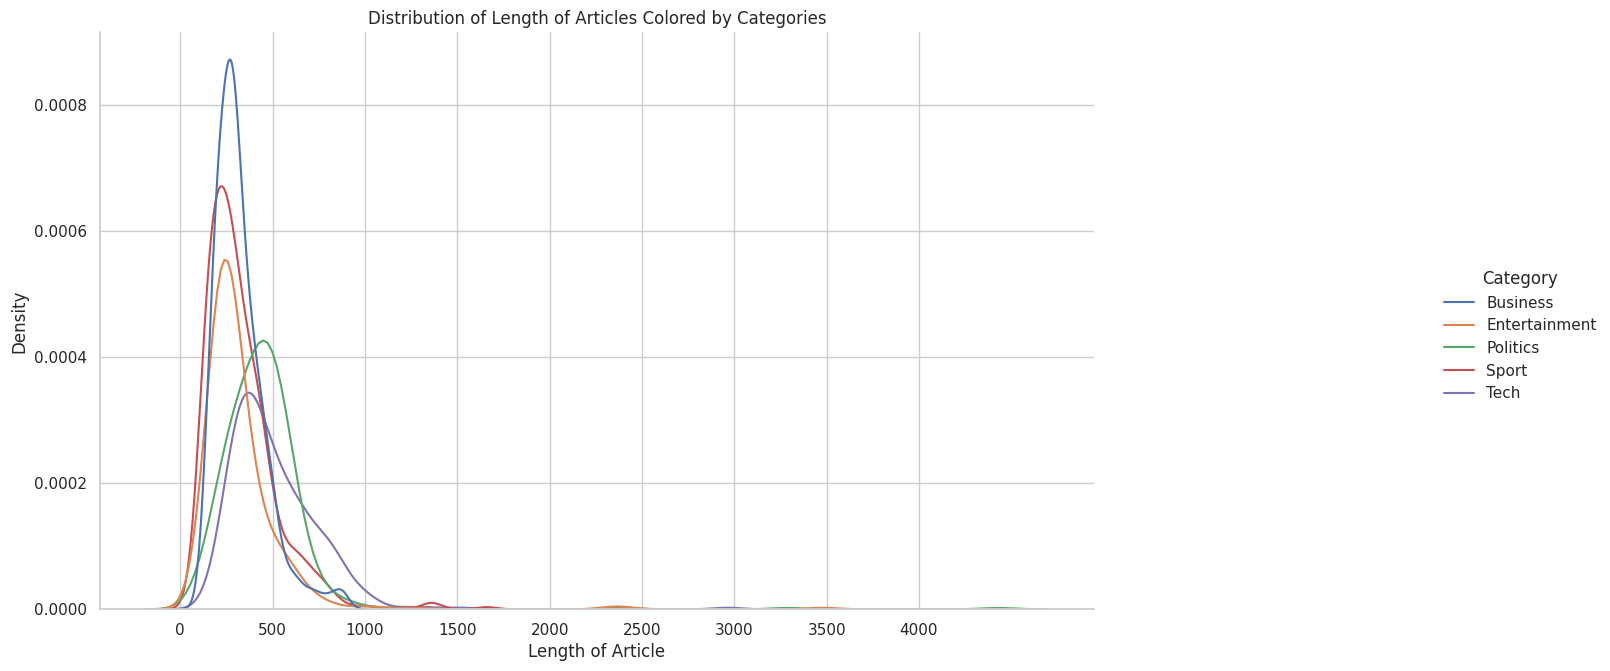

In [311]:
# Chart - 2 visualization code
# Set the style to 'whitegrid'
sns.set(style='whitegrid')

# Create a KDE distribution plot for the length of articles colored by categories
figu = sns.displot(x=data['Description'].str.split(' ').apply(len), hue=data['Category'], kind='kde')

# Set the figure size, title, x-label, and x-ticks
figu.figure.set_size_inches(18, 7)
figu.set(title='Distribution of Length of Articles Colored by Categories', xlabel='Length of Article', xticks=range(0, 4500, 500))

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The provided chart illustrates the distribution of article lengths for each category within the dataset. This density plot effectively highlights the specific distribution of word counts within the articles.

##### 2. What is/are the insight(s) found from the chart?

**Common Word Count:** The majority of articles in the dataset have a word count of approximately 250 words, indicating a common length for many articles.

**Politics Category:** Articles categorized under "Politics" tend to be longer in word count compared to other categories. This suggests that politics-related content often requires more extensive coverage and explanation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the dataset can indeed have a positive business impact, but there may be considerations that could lead to negative outcomes. Here's an evaluation of potential impacts:

Positive Business Impacts:

**Content Strategy:** Understanding the typical word count distribution for different categories can inform content strategies. For instance, recognizing that "Politics" articles tend to be longer could lead to more comprehensive and informative content in this category, which may attract and engage readers.

**Resource Allocation:** Businesses can allocate resources more effectively by tailoring their content production efforts based on the insights. For instance, if shorter articles are prevalent and popular, businesses can allocate resources to produce more of such content.

**Audience Engagement:** By aligning content length with audience preferences, businesses can improve engagement. If shorter articles are favored, businesses can focus on concise and impactful content to keep readers' attention.

Negative Growth Considerations:

**Uniformity:** Overreliance on observed trends in word count may lead to uniformity in content, which can be detrimental. Articles should vary in length when the topic and context demand it. Focusing solely on word count may limit the richness and depth of content.

**Neglecting Quality:** A focus on meeting word count expectations may divert attention from the quality and relevance of the content. This can negatively impact reader satisfaction and engagement.

**Ignoring Individuality**: Each article's unique requirements and objectives should be considered. Simply following a specific word count may not always align with the purpose of the content.

In summary, the insights can help in content optimization and resource allocation, potentially leading to positive business impacts. However, it's essential to balance these insights with the need for diverse, high-quality, and audience-specific content to avoid potential negative consequences. The key is to use the insights as a guideline rather than a rigid rule for content creation.

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [312]:
#length of the news
data['length']=data.Description.str.len()

In [313]:
#function to count the number of words in the article
def word_count(article):
  return len(article.split(" "))

In [314]:
# Getting word count of each article
data['word_count']=data['Description'].apply(word_count)

In [315]:
#Description of these new variable
df.describe()

Title  \
count                               2225   
unique                              2096   
top     Progress on new internet domains   
freq                                   2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Description  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [316]:
#Total number of words present in the whole corpus
Total_words=sum(data['word_count'])
Total_words

805472

In [317]:
# Percentage of Types of news in the dataset
data['Category'].value_counts(normalize=True)*100

Business         23.670588
Sport            23.670588
Politics         18.964706
Entertainment    17.364706
Tech             16.329412
Name: Category, dtype: float64

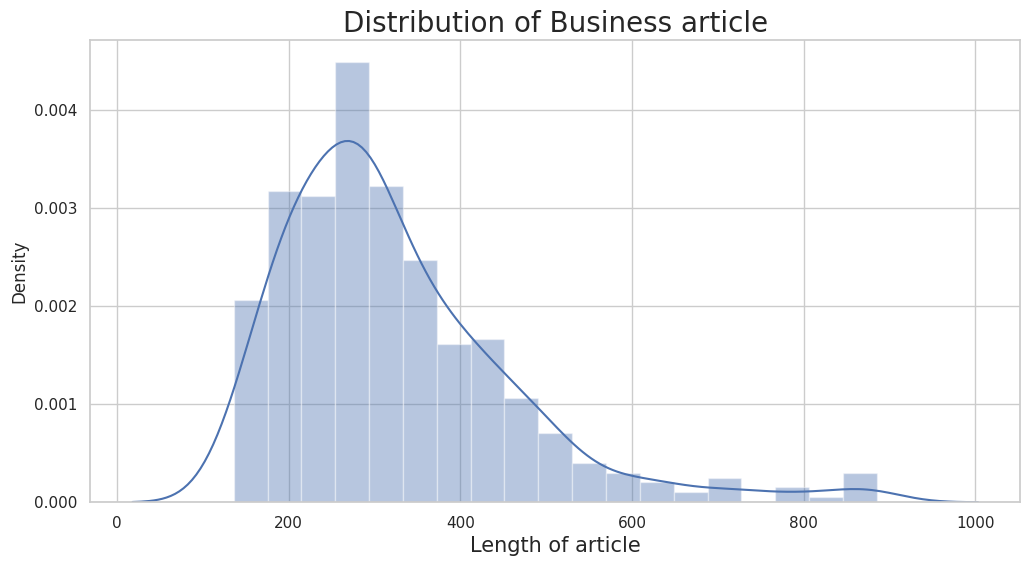

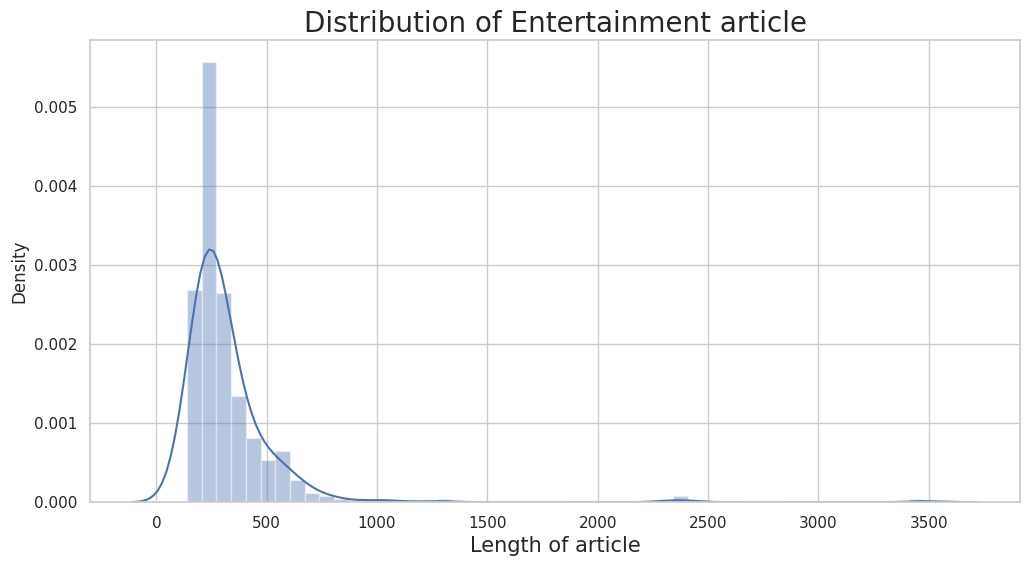

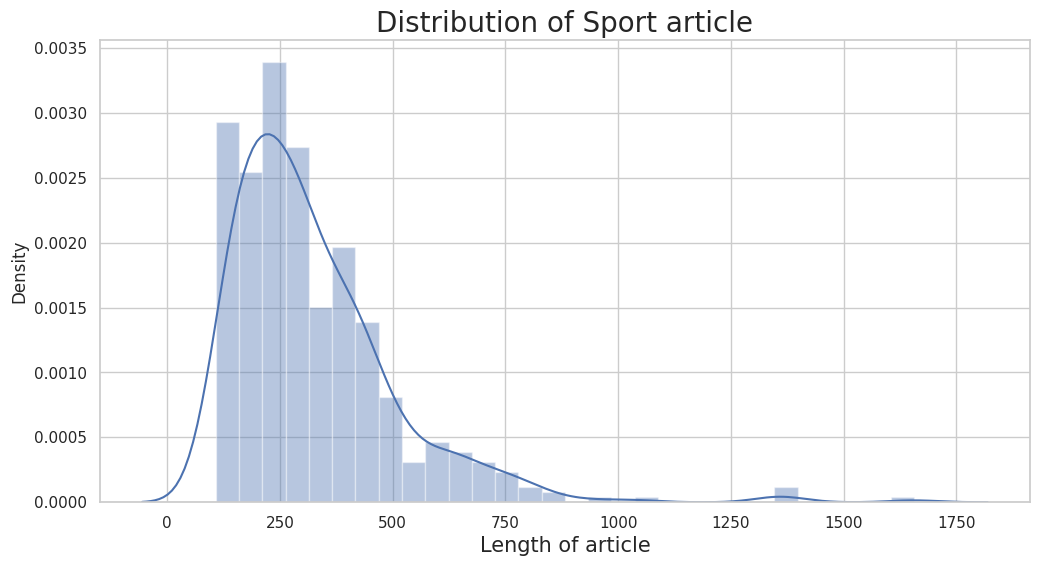

In [318]:
#Distribution of different types of articles
types_article=list(data['Category'].unique())
for article in types_article:
  data_article=data[data['Category']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=data_article['word_count'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15)

The analysis of the dataset reveals the following key observations:

**Article Distribution:** The "Business" and "Sports" topics have the highest number of news articles in the dataset, indicating a strong presence of content in these categories.

**Article Length in Business:** Articles in the "Business" category tend to be shorter in terms of word count, suggesting a preference for concise and to-the-point content in this category.

**Article Length in Politics and Entertainment:** In contrast, "Politics" and "Entertainment" articles are typically longer in word count compared to other categories. This implies a need for more extensive coverage and detail in these topics.

**Common Article Length:** The majority of articles in the dataset have a word count of approximately 500 words, indicating a common article length that many articles adhere to.

In [319]:
# Retrieve the content of the second article in the 'Description' column, located at row 1
data.loc[1, 'Description']

'More than 90% of large companies around the world are highly optimistic about their economic prospects, a survey of 1,300 bosses suggests. Their biggest worries are not terror threats, but over-regulation, low-cost competition and the wild ups and downs of oil prices. There is one exception: Firms in Western Europe - but not the UK - are lacking confidence after years of slow growth. When business advisers PricewaterhouseCoopers (PwC) conducted the same survey two years ago, nearly 30% of bosses were gloomy about their prospects. Global business leaders say that they are facing a two-pronged regulatory assault. After a string of corporate scandals in the United States - from Enron to WorldCom - the Sarbanes-Oxley act forces companies to be much more transparent, but doing all the paperwork costs a lot of time and money. Across Europe, meanwhile, all stock exchange-listed companies are currently in the process of moving to new and complex accounting standards called IFRS. Hacking throu

The dataset contains various punctuations and stopwords that need to be addressed in the upcoming sections. However, it's important to note that the data pre-processing will be applied only to the 'Description' feature.

#### 1. Expand Contraction

In [320]:
# Install and import contractions library
!pip install contractions

In [321]:
import contractions

In [322]:
# Function to expand contractions in text
def expand_contractions(text):
  '''Expands contractions in textual data'''
  expanded_words = []
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  return ' '.join(expanded_words)

In [323]:
# Expand Contraction
data['Description'] = data['Description'].apply(expand_contractions)

#### 2. Lower Casing

In [324]:
# Function to convert text to lowercase
def make_lower(text):
  '''Converts text to lowercase'''
  return text.lower()

In [325]:
# Lower Casing
data['Description'] = data['Description'].apply(make_lower)

#### 3. Removing Punctuations

In [326]:
# Function to remove all punctuation marks
def remove_punc(text):
  '''Removes all punctuation marks from text'''
  return re.sub(r'\W', ' ', text)

In [327]:
# Remove Punctuations
data['Description'] = data['Description'].apply(remove_punc)

In [328]:
data.loc[1, 'Description']

'more than 90  of large companies around the world are highly optimistic about their economic prospects  a survey of 1 300 bosses suggests  their biggest worries are not terror threats  but over regulation  low cost competition and the wild ups and downs of oil prices  there is one exception  firms in western europe   but not the uk   are lacking confidence after years of slow growth  when business advisers pricewaterhousecoopers  pwc  conducted the same survey two years ago  nearly 30  of bosses were gloomy about their prospects  global business leaders say that they are facing a two pronged regulatory assault  after a string of corporate scandals in the united states   from enron to worldcom   the sarbanes oxley act forces companies to be much more transparent  but doing all the paperwork costs a lot of time and money  across europe  meanwhile  all stock exchange listed companies are currently in the process of moving to new and complex accounting standards called ifrs  hacking throu

**Punctuations have been removed from the dataset.**

#### 4. Removing URLs & Removing words and digits contain digits.

In [329]:
# Count the number of articles containing 'http' in the 'Description' column
http_articles_count = data['Description'].str.contains('http').sum()
http_articles_count

0

**There are no URL present in given dataset.**

In [330]:
# Function to remove digits using the re library
def remove_digits(text):
  '''Removes digits from text using regular expressions'''
  return re.sub(r'\d', ' ', text)

# Function to remove extra whitespaces using the re library
def remove_whitespace(text):
  '''Removes extra whitespaces from text using regular expressions'''
  return re.sub(r'\s+', ' ', text)

In [331]:
# Remove URLs & Remove words and digits contain digits
data['Description'] = data['Description'].apply(remove_digits)
data['Description'] = data['Description'].apply(remove_whitespace)

In [332]:
data.loc[1, 'Description']

'more than of large companies around the world are highly optimistic about their economic prospects a survey of bosses suggests their biggest worries are not terror threats but over regulation low cost competition and the wild ups and downs of oil prices there is one exception firms in western europe but not the uk are lacking confidence after years of slow growth when business advisers pricewaterhousecoopers pwc conducted the same survey two years ago nearly of bosses were gloomy about their prospects global business leaders say that they are facing a two pronged regulatory assault after a string of corporate scandals in the united states from enron to worldcom the sarbanes oxley act forces companies to be much more transparent but doing all the paperwork costs a lot of time and money across europe meanwhile all stock exchange listed companies are currently in the process of moving to new and complex accounting standards called ifrs hacking through the red tape can hardly be avoided b

**Digits and whitespaces are eliminated from the dataset.**

#### 5. Removing Stopwords & Removing White spaces

In [333]:
# Function to remove stopwords from text
def remove_stopwords(text, stop_words):
  '''Removes stopwords (given as input) from text'''
  text = [word for word in text.split() if word.lower() not in stop_words]
  return ' '.join(text)

In [334]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [335]:
# Remove stopwords from the 'Description' column using a list of stop words
stop_words = stopwords.words('english')
data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)

In [336]:
data.loc[1, 'Description']

'large companies around world highly optimistic economic prospects survey bosses suggests biggest worries terror threats regulation low cost competition wild ups downs oil prices one exception firms western europe uk lacking confidence years slow growth business advisers pricewaterhousecoopers pwc conducted survey two years ago nearly bosses gloomy prospects global business leaders say facing two pronged regulatory assault string corporate scandals united states enron worldcom sarbanes oxley act forces companies much transparent paperwork costs lot time money across europe meanwhile stock exchange listed companies currently process moving new complex accounting standards called ifrs hacking red tape hardly avoided many chief executives around world appear decided deal low cost competitors already bosses polled survey say moved parts business low wage countries another plan future possibly result worry low cost competition slightly fallen last year companies calling significant threat o

**Stopwords have been removed from the dataset.**

In [337]:
def top_n_words_features(count_vectorizer, text, n_words):
    '''
    Returns the top n words in a sample and their counts, given a CountVectorizer object and text sample
    Also returns the total number of unique words/features tokenized
    '''
    # Vectorize the text using the CountVectorizer
    vectorized = count_vectorizer.fit_transform(text)

    # Create a DataFrame with the tokenized words and their counts
    tokens_df = pd.DataFrame(vectorized.todense(), columns=count_vectorizer.get_feature_names_out())

    # Get the top n words by summing the counts and sorting in descending order
    top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False).head(n_words)).rename(columns={'Occurences': 'Count'})

    # Return the DataFrame with the top words and the total number of unique words
    return top_df, len(count_vectorizer.get_feature_names_out())

In [338]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Get the top 10 words and the total number of unique words in the text
top_words, n_features_raw = top_n_words_features(vectorizer, data['Description'], 10)

<Axes: >

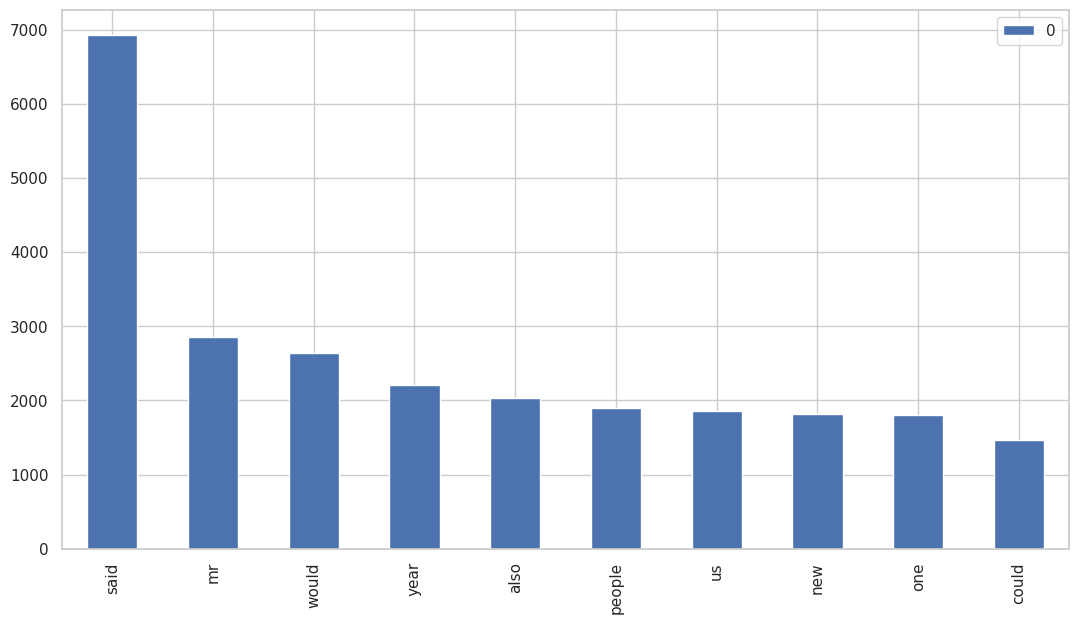

In [339]:
top_words.plot(kind='bar', figsize = (13,7))

In [340]:
n_features_raw

27573

The analysis reveals that there are a total of 27,573 unique words in the dataset, which indicates a high level of dimensionality. To improve the efficiency and interpretability of text analysis, dimensionality reduction techniques should be considered. These techniques can help identify and retain the most important features while reducing the complexity of the dataset.

#### 6. Text Lemmatization

In [341]:
# Download necessary resources for Lemmatization using NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [342]:
# Function to lemmatize verbs in text
def lemmatize_verbs(text, lemmatizer):
  '''Lemmatizes verbs in the text using a lemmatizer'''
  text = [lemmatizer.lemmatize(word, pos='v') for word in text.split()]
  return ' '.join(text)

In [343]:
# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to verbs in the 'Description' column
data['Description'] = data['Description'].apply(lemmatize_verbs, lemmatizer=lemmatizer)

In [344]:
# Get the top 10 words and the total number of unique words in the preprocessed text
top_words, n_features = top_n_words_features(vectorizer, data['Description'], 10)

In [345]:
# Create a bar plot for the top words
top_words.plot(kind='bar', figsize=(13, 7))

<Axes: >

In [346]:
n_features

22545

The number of unique features has been successfully reduced to 22,545. This reduction in dimensionality is achieved through preprocessing techniques, including text lemmatization. Lemmatization is chosen over stemming due to its suitability for contextual analysis, where the context in which a word is used is essential. This contextual understanding is crucial for topic modeling, making lemmatization the preferred choice.

## **Removing further Stopwords**

The analysis reveals that certain highly frequent words like "say," "mr," "would," "also," etc., do not significantly contribute to the determination of a topic or category. Due to their excessive frequency, these words could be safely eliminated from the text data as they do not provide meaningful information for topic modeling. This removal of common and less informative words is a common practice in text preprocessing to enhance the quality of text data for further analysis.

In [347]:
# Extend the list of stop words with additional common words
stop_words.extend(['say', 'mr', 'would', 'also'])

# Remove the extended stop words from the 'Description' column
data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)

<Axes: >

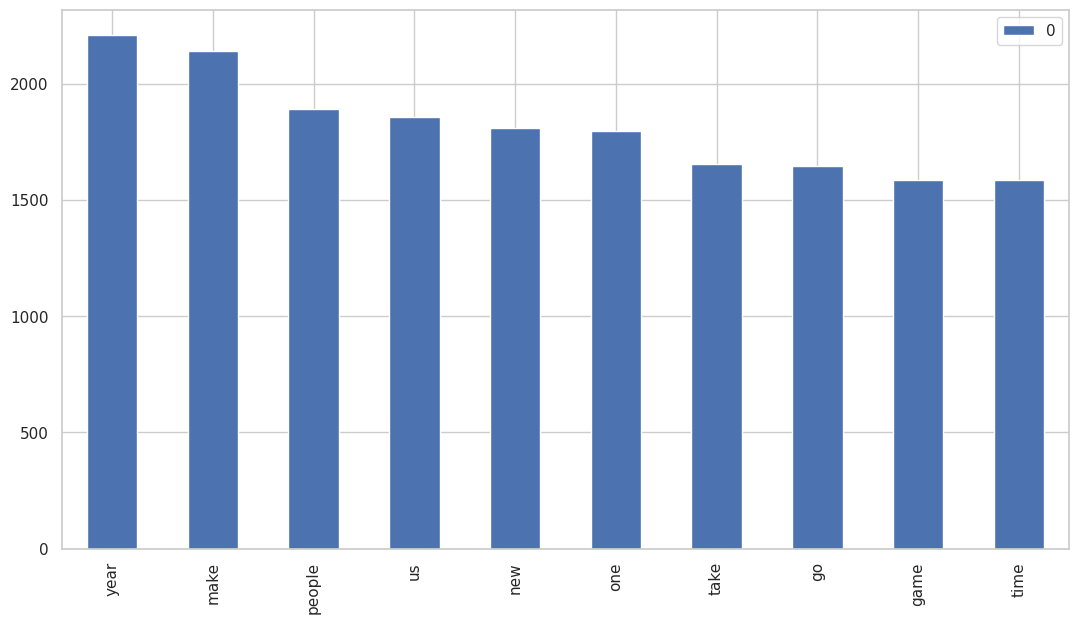

In [348]:
# Plot the top 10 words after text preprocessing
top_n_words_features(vectorizer, data['Description'], 10)[0].plot(kind='bar', figsize=(13, 7))

#### 7. Tokenization

In [349]:
# Vectorizing Text using CountVectorizer with specified parameters
tokenizer = CountVectorizer(max_df=0.95, min_df=0.02)
tokenized_data = tokenizer.fit_transform(data['Description'])

In [350]:
# Get the top 10 words and the total number of unique words after vectorization
top_words, n_features = top_n_words_features(tokenizer, data['Description'], 10)

<Axes: >

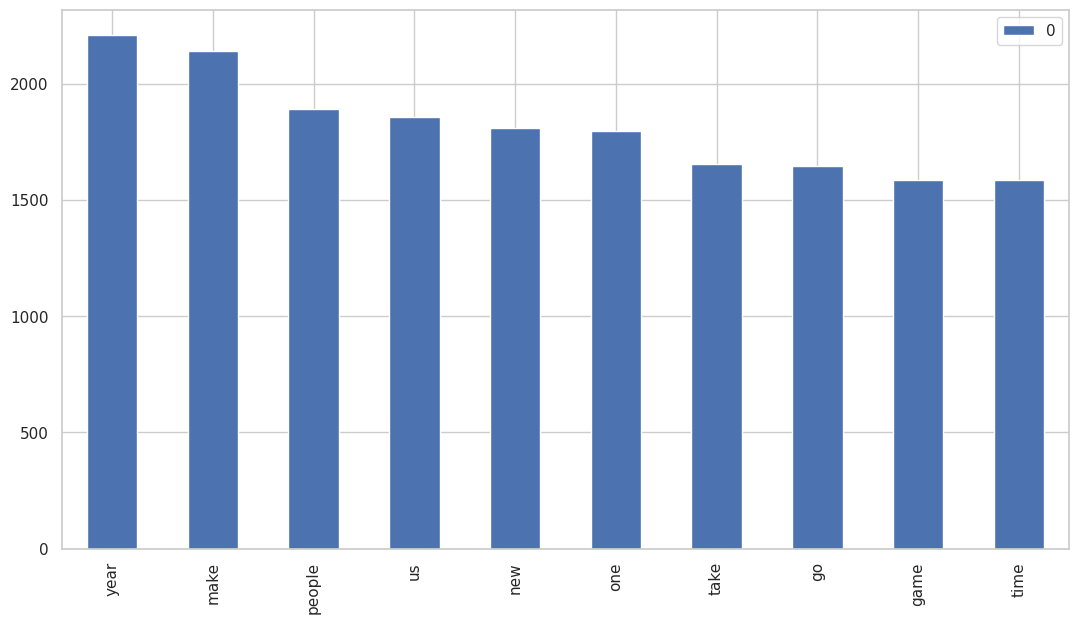

In [351]:
# Create a bar plot for the top words in the vectorized data
top_words.plot(kind='bar', figsize=(13, 7))

In [352]:
# Print the number of features after vectorization
print(f'Number of features after vectorization: {n_features}')

# Calculate and print the reduction in features after text preprocessing
reduction_percentage = round((n_features_raw - n_features) * 100 / n_features_raw, 2)
print(f'\nFeature reduction after text preprocessing: {reduction_percentage}%')

Number of features after vectorization: 1436

Feature reduction after text preprocessing: 94.79%


The analysis demonstrates a significant reduction in the number of features (unique words) in the dataset, primarily attributed to the inclusion of the keyword arguments max_df and min_df during vectorization. This reduction is substantial, and it's notable that the number of documents (articles) now exceeds the number of features. With this dimensionality reduction accomplished, the dataset is ready for model building and advanced text analysis, such as topic modeling.

Which text vectorization technique have you used and why?

Count Vectorization is selected for text vectorization in this context because Latent Dirichlet Allocation (LDA), as a word generating algorithm, inherently deals with term counts to generate words from a multinomial distribution. This choice aligns with the nature of LDA and its assumptions about the distribution of words in documents.

It's important to note that the statement above is considered a null hypothesis. To validate this hypothesis, the Tfidf-Vectorizer is employed for text vectorization. The subsequent section provides further details on this validation process.

## ***7. ML Model Implementation***

### ML Model - 1 **Latent Dirichlet Allocation**

The business requirement is to identify and categorize documents into five topics. However, to determine the optimum number of topics, a hyperparameter tuning process is conducted using GridSearchCV for numbers of topics greater than or equal to five. This approach aims to find the most suitable number of topics, which may result in an optimal categorization of documents.

If the identified optimum number of topics is greater than five, a strategy can be employed to appropriately combine topics, allowing the final categorization of documents into the required five topics. This flexible approach ensures that the topic modeling process aligns with the business requirements, even if the optimal number of topics exceeds the initial target.

In [353]:
# Define the range of candidate number of topics
n_topics_range = list(range(5, 10))

# Create an LDA model
lda = LatentDirichletAllocation(random_state=42)

# Perform GridSearch to find the best number of topics
param_grid = {'n_components': n_topics_range}
lda_model = GridSearchCV(lda, param_grid=param_grid)
lda_model.fit(tokenized_data)

GridSearchCV(estimator=LatentDirichletAllocation(random_state=42),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [354]:
# Get the best LDA model and its evaluation metrics
best_lda_model = lda_model.best_estimator_
best_params = lda_model.best_params_
log_likelihood = lda_model.best_score_
perplexity = best_lda_model.perplexity(tokenized_data)

# Print the results
print("Parameters of Best LDA Model:", best_params)
print("Best Log Likelihood Score for the LDA Model:", log_likelihood)
print("Perplexity Score on the LDA Model:", perplexity)

Parameters of Best LDA Model: {'n_components': 5}
Best Log Likelihood Score for the LDA Model: -440223.92312249466
Perplexity Score on the LDA Model: 741.3812205860239


The analysis reveals that the optimal number of topics, as determined by the best LDA model, is indeed five. This aligns perfectly with the business requirement of categorizing documents into five topics. Therefore, we proceed with this best LDA model, ensuring that it fulfills the specified business objective.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The best LDA model, as determined through hyperparameter tuning, has the following parameters:

**Number of Topics (n_components)**: 5
The model's performance is assessed using evaluation metrics:

**Log Likelihood Score**: -440,223.92

A higher log likelihood indicates a better model fit to the data. In this case, the negative value is normal as the likelihood is a probability, and a higher value means the data is more probable given the model.

**Perplexity Score**: 741.38

Perplexity measures how well the model predicts the data. Lower perplexity values indicate better model performance.

By analyzing this chart, it can be determined whether the model effectively assigns documents to the correct topics and whether the topics are well-defined and distinct from each other. This visual assessment complements the numeric evaluation metrics and provides a holistic understanding of the model's performance.

In [355]:
# Install pyLDAvis
!pip install pyLDAvis

# Import pyLDAvis and enable for visualization
import pyLDAvis
pyLDAvis.enable_notebook()

In [356]:
# Transform the first document in the tokenized dataset using the trained LDA model
lda_model.transform(tokenized_data[0])

array([[0.0011757 , 0.38014832, 0.02642142, 0.59107506, 0.0011795 ]])

In [357]:
def assign_topics(data, tokenized, model):
    '''Assigns topics for each document based on the highest probability of a topic for each document.
    Returns the input DataFrame with an additional column of topics assigned through the model.

    Args:
        data (DataFrame): Pre-processed data.
        tokenised: Tokenized data.
        model: The LDA model.

    Returns:
        DataFrame: The original data with an additional 'Topic_LDA' column.
    '''

    # Calculate the probability distribution of topics for each document. Shape - (n_documents, n_topics)
    topic_dist = model.transform(tokenized)

    topics = []
    # Assign (index+1) of the topic with the maximum probability as the topic name for each document
    for doc in topic_dist:
        topics.append(np.argmax(np.abs(doc)) + 1)

    # Convert to a DataFrame and merge it with the original pre-processed DataFrame using document indices
    topics_df = pd.DataFrame(topics, columns=['Topic_LDA'])
    return pd.concat([data, topics_df], axis=1)

In [358]:
# Assign topics to each document in the dataset using the best LDA model
result_df = assign_topics(data, tokenized_data, best_lda_model)

In [359]:
# Display the first two rows of the 'result_df' DataFrame to see the assigned topics for the documents
result_df.head(2)

Title  \
0  Aids and climate top Davos agenda   
1    Euro firms miss out on optimism   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description  \
0  climate change fight aid lead list concern first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair open speech wednesday blair focus africa development plan global warm earlier day come update efforts million people anti aid drug end world health organisation people poor countries life extend drug six months earlier amount million need bn fund gap still stand way hit target theme stress blair whose attendance announce last minute want dominate uk chairmanship g group industrialise state issue discuss five day conference range china economic power iraq future sunday elections aside blair world leaders expect attend include french president jacques chirac due speak video link bad weather delay helicopter south african president thabo mbeki whose arrival delay ivory coast peace talk ukraine new president viktor yushchenko newly elect palestinian leader mahmoud abbas showbiz figure put appearance u frontman bono well know campaigner trade development issue angelina jolie goodwill campaigner un refugees unlike previous years protest wef expect mute anti globalisation campaigners call demonstration plan weekend time people expect converge brazilian resort porto alegre world social forum call anti davos campaigners globalisation fair trade many cause contrast davos forum dominate business issue outsource corporate leadership boss fifth world largest company schedule attend survey publish eve conference pricewaterhousecoopers four ten business leaders confident company see sales rise asian american executives however much confident european counterparts political discussions focus iran iraq china likely dominate media attention   
1                                                                       large company around world highly optimistic economic prospect survey boss suggest biggest worry terror threats regulation low cost competition wild oil price one exception firm western europe uk lack confidence years slow growth business advisers pricewaterhousecoopers pwc conduct survey two years ago nearly boss gloomy prospect global business leaders face two pronged regulatory assaul

In [360]:
# Group the 'result_df' DataFrame by both 'Category' and 'Topic_LDA' columns and count the number of articles in each group
result_df.groupby(['Category', 'Topic_LDA'])['Title'].count()

Category       Topic_LDA
Business       2            429
               3             13
               4             60
               5              1
Entertainment  1            340
               2              3
               3              8
               4             16
               5              2
Politics       1              1
               3              3
               4            398
               5              1
Sport          1              2
               2              3
               4              4
               5            494
Tech           1             10
               2              4
               3            314
               4              8
               5             11
Name: Title, dtype: int64

The provided analysis reveals that the LDA model performed with high precision in predicting topics for each category. For instance, in the 'Business' category, the model correctly predicted 430 out of 503 articles, all labeled as Topic 2. These results enable a one-to-one mapping of input categories to LDA topics. In this specific case, Topic 2 corresponds to the 'Business' category, and so on.

In [361]:
def convert_labels(result):
    '''Converts the integer labels to Category names'''

    to_map = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count()

    # Convert the groupby dataframe to a Dataframe with input category and the label through LDA to be mapped
    to_map = to_map.groupby('Category', as_index=False).apply(lambda x: x['Topic_LDA'][x['Title'].idxmax()]).rename(columns = str).rename(columns = {'None':'LDA'})

    # Mapping and updating the Topic_LDA column
    to_map_dict = dict(zip(to_map['LDA'], to_map['Category']))
    result['Topic_LDA'] = result['Topic_LDA'].map(to_map_dict)

    for category, lda_topic in to_map_dict.items():
        print(f'{lda_topic} is mapped to {category}')

    return result

In [362]:
result_df = convert_labels(result_df)

Business is mapped to 2
Entertainment is mapped to 1
Politics is mapped to 4
Sport is mapped to 5
Tech is mapped to 3


In [363]:
# Display the first 2 rows of the result DataFrame
result_df.head(2)

Title  \
0  Aids and climate top Davos agenda   
1    Euro firms miss out on optimism   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description  \
0  climate change fight aid lead list concern first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair open speech wednesday blair focus africa development plan global warm earlier day come update efforts million people anti aid drug end world health organisation people poor countries life extend drug six months earlier amount million need bn fund gap still stand way hit target theme stress blair whose attendance announce last minute want dominate uk chairmanship g group industrialise state issue discuss five day conference range china economic power iraq future sunday elections aside blair world leaders expect attend include french president jacques chirac due speak video link bad weather delay helicopter south african president thabo mbeki whose arrival delay ivory coast peace talk ukraine new president viktor yushchenko newly elect palestinian leader mahmoud abbas showbiz figure put appearance u frontman bono well know campaigner trade development issue angelina jolie goodwill campaigner un refugees unlike previous years protest wef expect mute anti globalisation campaigners call demonstration plan weekend time people expect converge brazilian resort porto alegre world social forum call anti davos campaigners globalisation fair trade many cause contrast davos forum dominate business issue outsource corporate leadership boss fifth world largest company schedule attend survey publish eve conference pricewaterhousecoopers four ten business leaders confident company see sales rise asian american executives however much confident european counterparts political discussions focus iran iraq china likely dominate media attention   
1                                                                       large company around world highly optimistic economic prospect survey boss suggest biggest worry terror threats regulation low cost competition wild oil price one exception firm western europe uk lack confidence years slow growth business advisers pricewaterhousecoopers pwc conduct survey two years ago nearly boss gloomy prospect global business leaders face two pronged regulatory assaul

In [364]:
# Define a function to plot the count of articles categorized by each category and compare it with the input categories
# Plotting the count of Articles categorised by each category and comparing with input Categories
def aggregate_plot(result_df):
  '''Plots the number of articles categorised in each category by the LDA
  and compared with the original categorisation provided as input'''
  aggregated_input = pd.DataFrame(result_df['Category'].value_counts())
  aggregated_LDA = pd.DataFrame(result_df['Topic_LDA'].value_counts())
  aggregated = pd.merge(aggregated_input, aggregated_LDA, left_index=True, right_index=True)
  aggregated.plot(kind='bar', figsize=(13,7))
  plt.show()

# Computing the model accuracy
def model_accuracy(result):
  '''Computes the model accuracy, defined as the number of articles
  correctly categorised to the total number of articles'''

  df1 = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count().rename(columns = {'Title':'Count'})

  # Articles correctly categorised in the topic
  correct_preds = df1[df1['Category'] == df1['Topic_LDA']]['Count'].reset_index()['Count'].sum()

  total_accuracy = correct_preds/result.shape[0]
  return total_accuracy * 100

# Computing the precision, recall and F1 scores for each topic modeled by the LDA model
def topic_precision(dfp):
  '''Defined as the number of articles correctly categorised to the total articles in the topic through LDA'''

  # Total articles present in each topic through LDA (TP + FP)
  predicted_articles_total = dfp.groupby('Topic_LDA')['Count'].sum().reset_index()

  # Articles correctly categorised in each topic (TP)
  predicted_articles = dfp[dfp['Category'] == dfp['Topic_LDA']]['Count'].reset_index()['Count']

  # Calculating the precision
  predicted_articles_total['Count'] = (predicted_articles/predicted_articles_total['Count'])*100
  return predicted_articles_total.rename(columns = {'Count':'Precision', 'Topic_LDA':'Topic'})

def topic_recall(dfr):
  '''Defined as the number of articles correctly categorised to the total articles originally in the topic'''

  # Total articles present in each topic through LDA (TP + FN)
  predicted_articles_total = dfr.groupby('Category')['Count'].sum().reset_index()

  # Articles correctly categorised in each topic (TP)
  predicted_articles = dfr[dfr['Category'] == dfr['Topic_LDA']]['Count'].reset_index()['Count']

  # Calculating the Recall
  predicted_articles_total['Count'] = (predicted_articles/predicted_articles_total['Count'])*100
  return predicted_articles_total.rename(columns = {'Count':'Recall', 'Category':'Topic'})

def precision_recall_f1(result):
  ''' Gives the precision, recall, and F1 score for each category'''

  df1 = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count().rename(columns = {'Title':'Count'})

  # Calculating precision and adding a column
  precisions = topic_precision(df1)

  # Calculating recall and adding a column
  recalls = topic_recall(df1)

  # Merging and Calculating F1 Score
  prf1 = pd.merge(recalls, precisions, on = 'Topic')
  prf1['F1_Score'] = (2*prf1['Precision']*prf1['Recall'])/(prf1['Precision'] + prf1['Recall'])
  return prf1

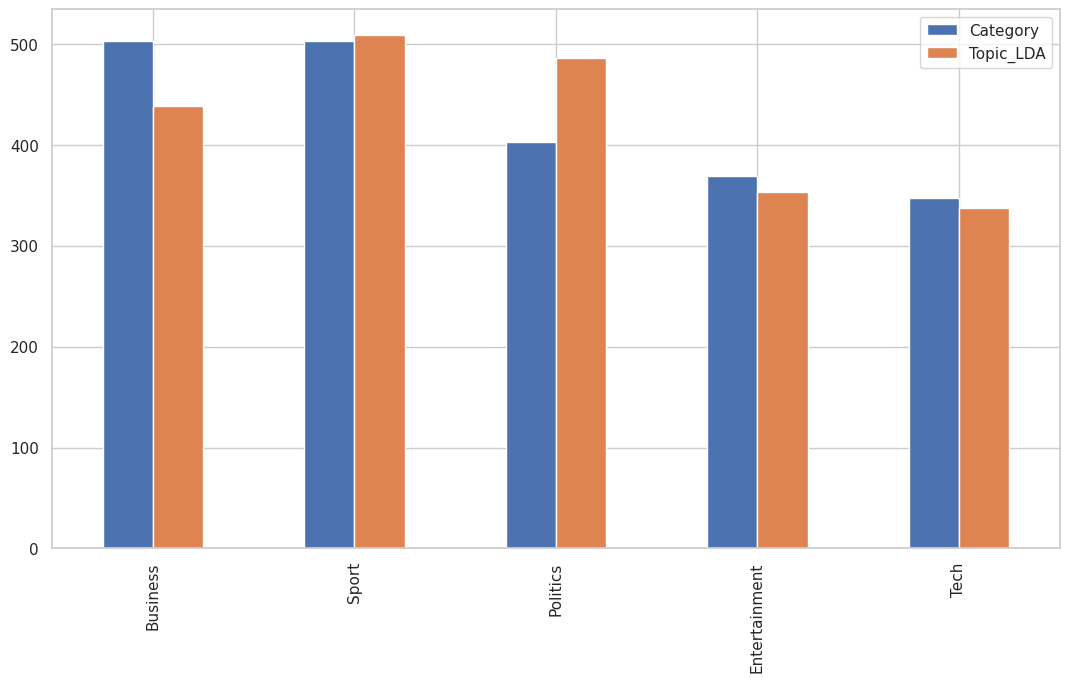

In [365]:
# Visualize the count of articles categorized in each category and compare it with the input categories
aggregate_plot(result_df)

In [366]:
# Calculate and display the accuracy of the LDA model
print(f'The LDA model has an accuracy of {round(model_accuracy(result_df), 2)}%')

The LDA model has an accuracy of 92.94%


In [367]:
# Calculate precision, recall, and F1 scores for each category
prf1_m1 = precision_recall_f1(result_df)

# Display the calculated scores
prf1_m1

Topic     Recall  Precision   F1_Score
0       Business  85.288270  97.722096  91.082803
1  Entertainment  92.140921  96.317280  94.182825
2       Politics  98.759305  81.893004  89.538808
3          Sport  98.210736  97.053045  97.628458
4           Tech  90.489914  92.899408  91.678832

It can be observed that the LDA model has a good accuracy and excellent F1 scores in Topic modeling for most of the Categories.

#### 2. Topic-wise analysis - Term distributions for each Topic


In [368]:
def top_n_terms(vectorizer, model, n_top_words):
    '''Get the top N terms for each topic in the LDA model.

    Args:
    - vectorizer: CountVectorizer object used to preprocess the text data.
    - model: Fitted LDA model.
    - n_top_words: Number of top words to retrieve for each topic.

    Returns:
    - List of dictionaries, where each dictionary contains the top N words and their weights for a topic.
    '''

    # List of all words vectorized
    words = vectorizer.get_feature_names_out()

    # List of N dictionaries for each topic
    top_words_topic = []
    for topic, weights in enumerate(model.components_):
        word_weights = dict()

        # Indices of top N words
        indices = np.argsort(weights)[::-1][:n_top_words]

        # Top N words and their weights
        top_words = words[indices]
        top_weights = weights[indices]

        for i in range(len(words[indices])):
            word_weights[top_words[i]] = top_weights[i]
        top_words_topic.append(word_weights)
    return top_words_topic

def plot_wordcloud(topic_term_freq):
    '''Generate and display a word cloud based on word frequencies in a topic.

    Args:
    - topic_term_freq: Dictionary containing word frequencies in the topic.
    '''

    colours = ['black', 'darkslateblue', 'darkolivegreen', 'khaki']
    wordcloud = WordCloud(width=1300, height=800,
                          background_color=random.choice(colours),
                          min_font_size=10).generate(' '.join(list(topic_term_freq.keys())))
    wordcloud = wordcloud.generate_from_frequencies(frequencies=topic_term_freq)
    plt.figure(figsize=(13, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [369]:
# Getting the top 100 words for each topic
top_words = top_n_terms(tokenizer, best_lda_model, 100)

# Print the top 100 words for the first topic
print("Top 100 words for the first topic:")
print(top_words[0])

Top 100 words for the first topic:
{'film': 1063.1906928849728, 'best': 653.0134206158085, 'award': 595.609900879868, 'show': 487.0383559934353, 'music': 481.76281342872454, 'year': 473.17051666804304, 'star': 441.01919160753033, 'one': 377.08026225271635, 'include': 370.76428004021164, 'us': 324.8924318174158, 'make': 312.8417434728909, 'new': 310.4144124833864, 'take': 298.9466629312945, 'top': 269.7291214341717, 'first': 267.16847758801623, 'go': 244.41684615895906, 'band': 238.8085354618299, 'uk': 233.29962533651192, 'record': 230.23012307536922, 'years': 229.00519050099496, 'last': 224.65067015886132, 'release': 222.3308211864049, 'play': 218.64229076291105, 'british': 216.85467073613103, 'two': 215.00232478403, 'tv': 214.7624728026481, 'director': 214.55521764864076, 'number': 210.54323828986284, 'time': 198.63604550282272, 'actor': 194.19756292258091, 'bbc': 184.4927582919398, 'album': 175.19877081802625, 'song': 174.19496299170592, 'prize': 173.4438861428649, 'chart': 172.19542

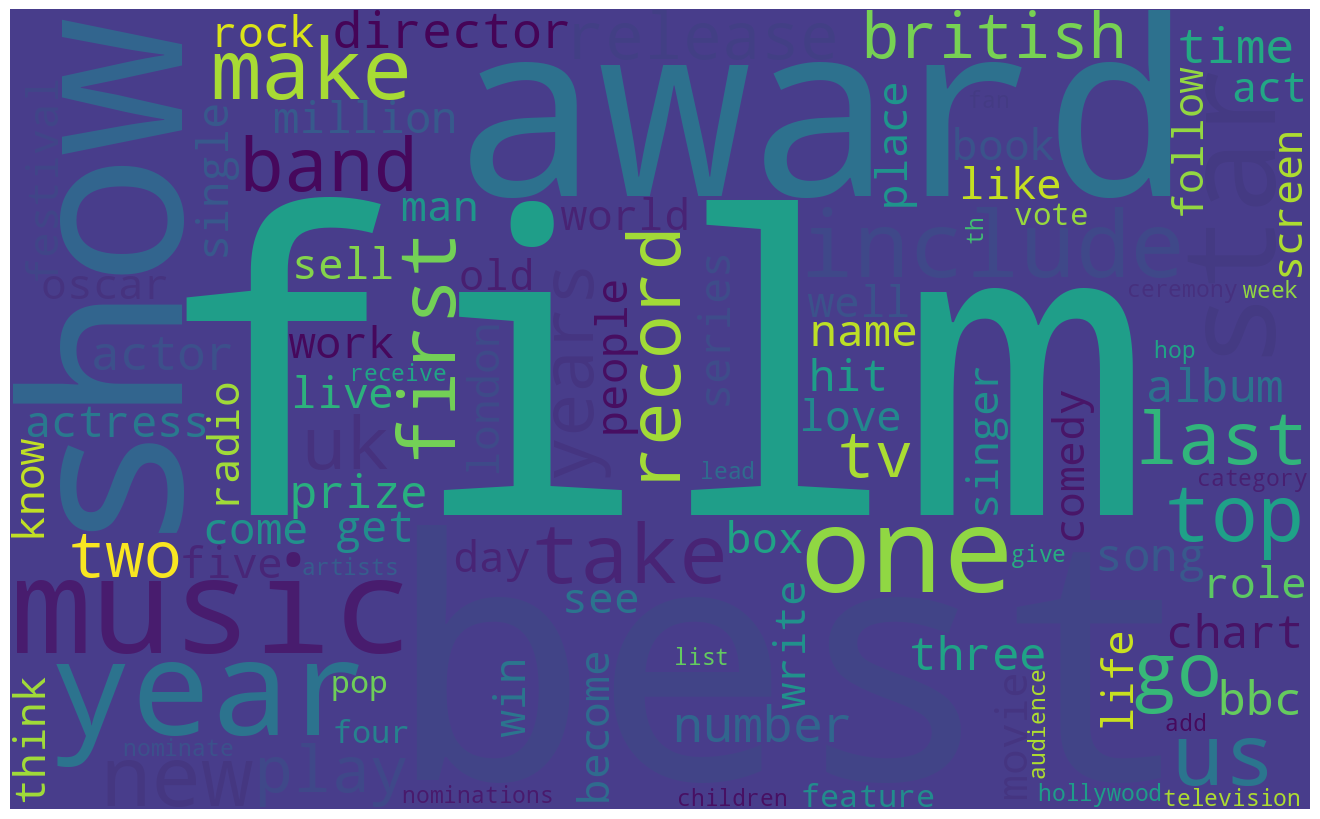

In [370]:
# Plot a word cloud for the top words in the first topic
plot_wordcloud(top_words[0])

Looking at the word distributions, it can be concluded that this is the Entertainment Topic

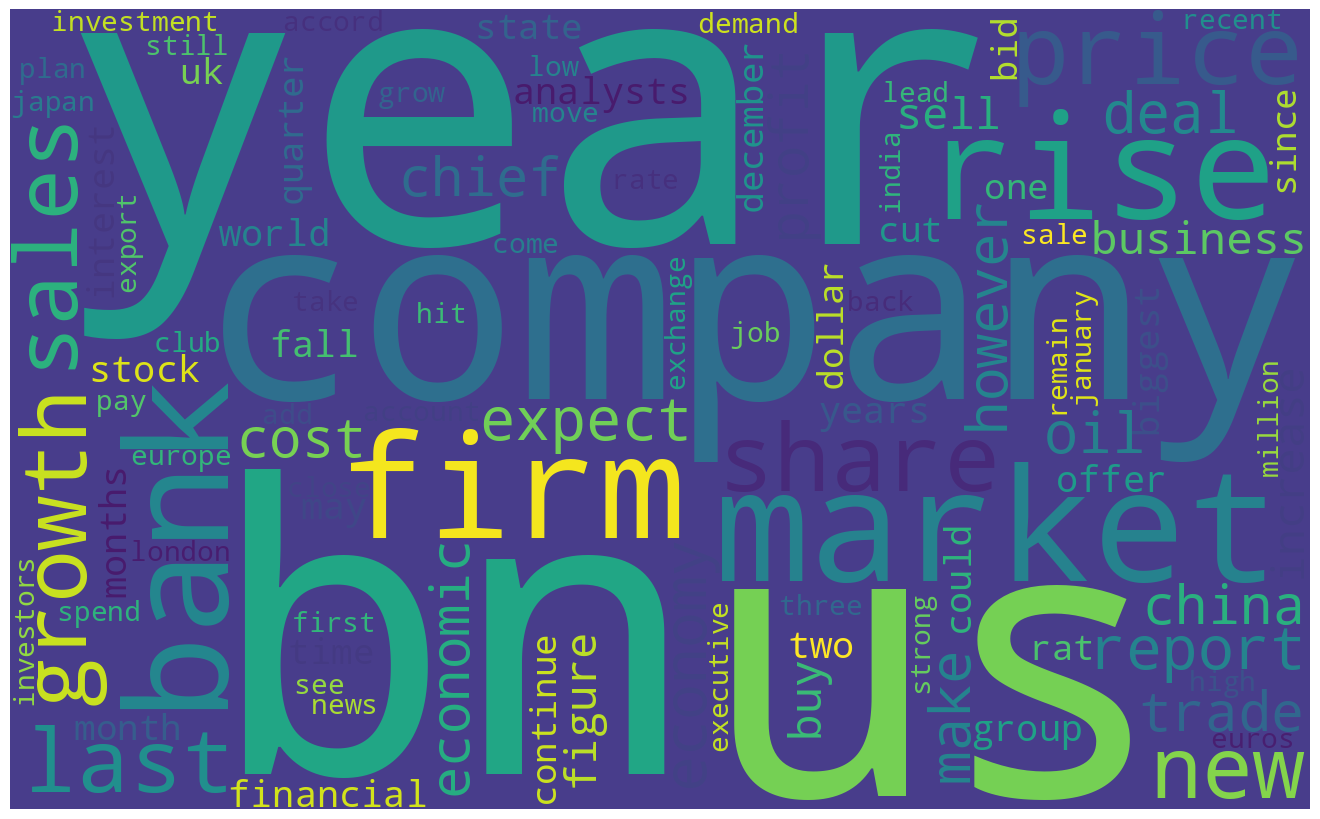

In [371]:
# Plot a word cloud for the top words in the second topic
plot_wordcloud(top_words[1])

Looking at the word distributions, it can be concluded that this is the Business Topic

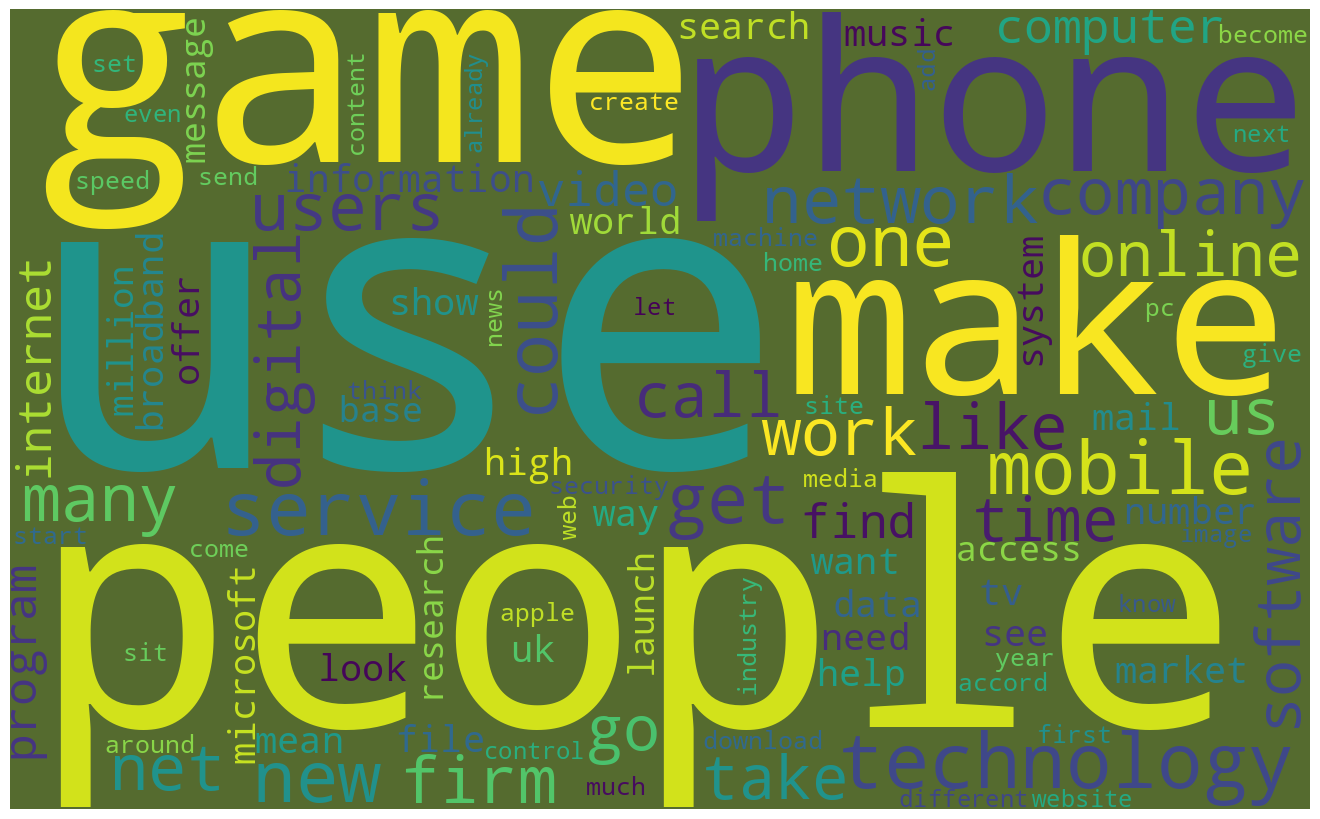

In [372]:
# Plot a word cloud for the top words in the third topic
plot_wordcloud(top_words[2])

Looking at the word distributions, it can be concluded that this is the Tech Topic

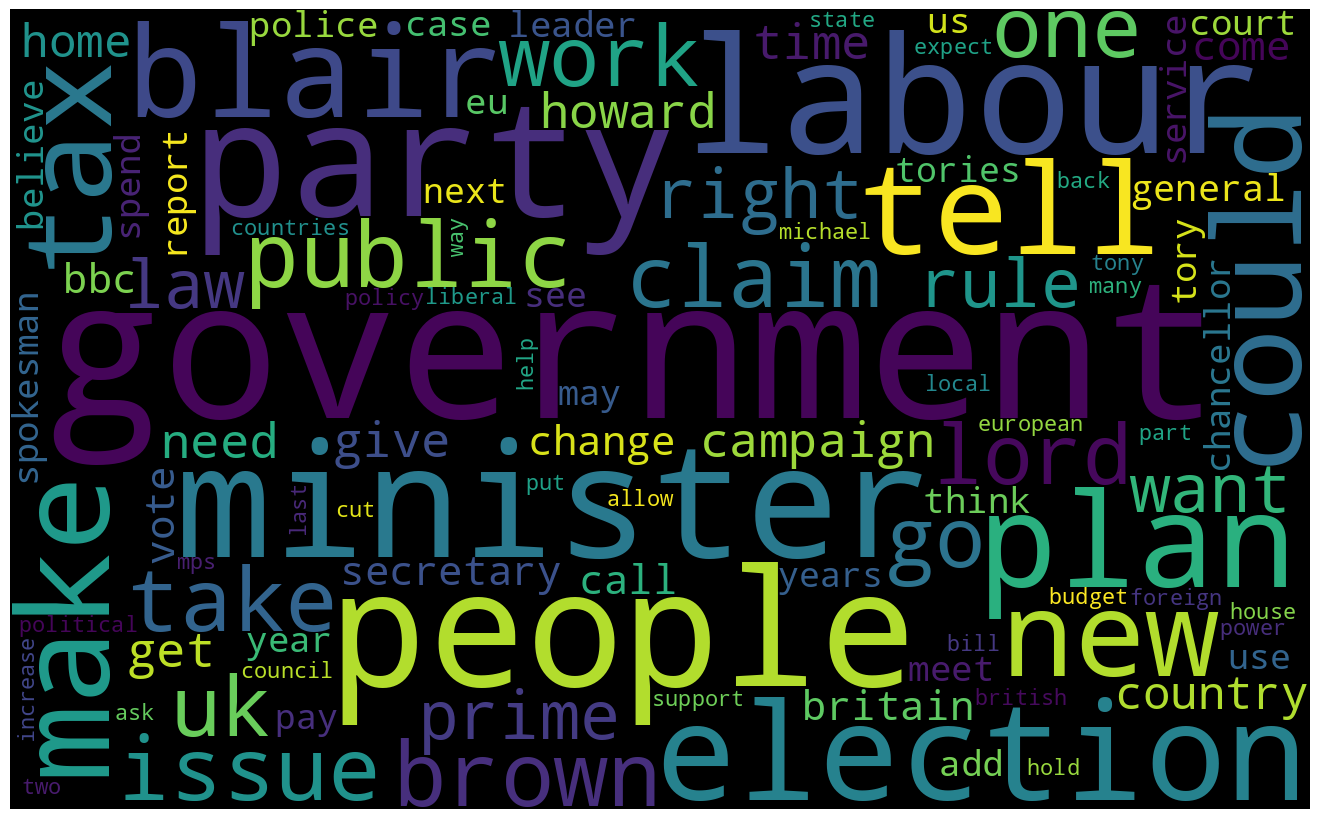

In [373]:
# Plot a word cloud for the top words in the fourth topic
plot_wordcloud(top_words[3])

Looking at the word distributions, it can be concluded that this is the Politics Topic

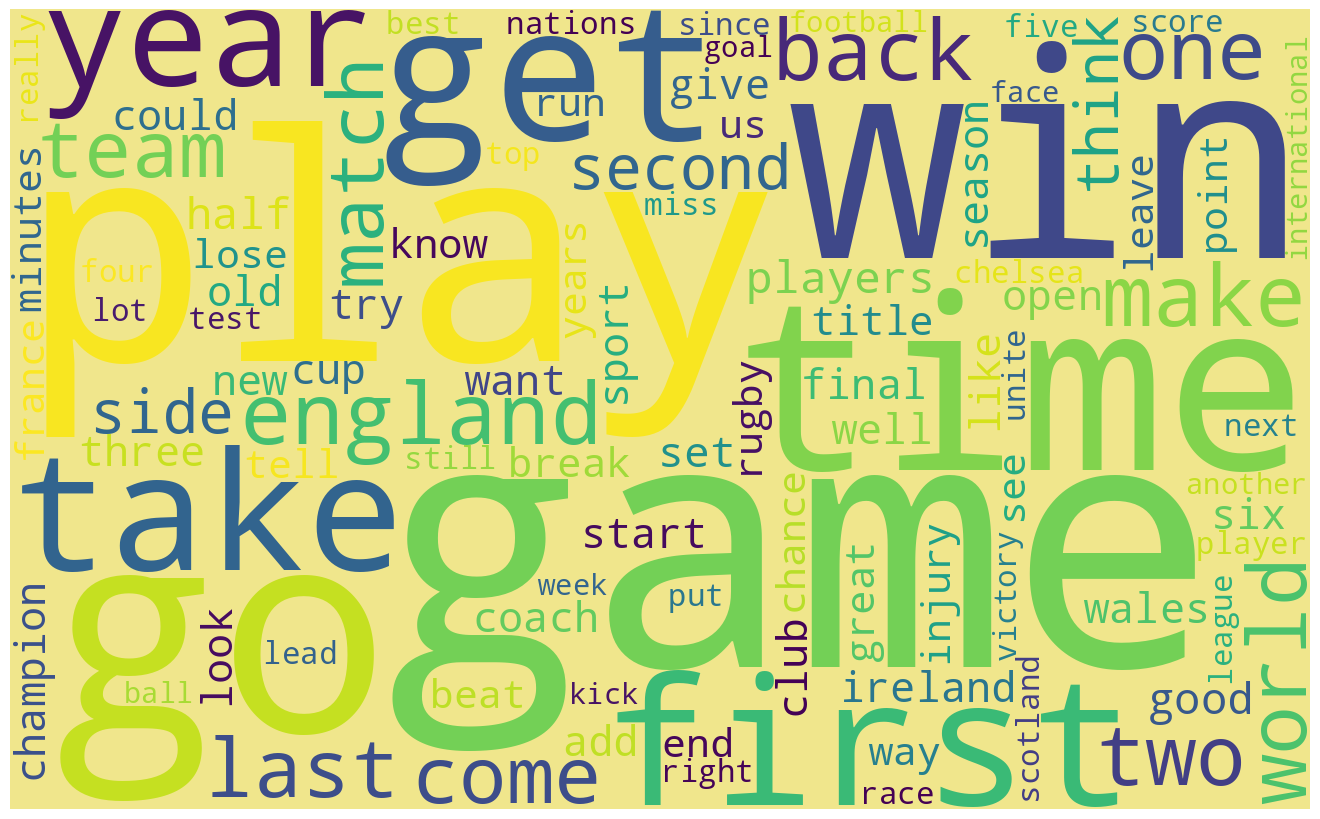

In [374]:
# Plot a word cloud for the top words in the fifth topic
plot_wordcloud(top_words[4])

Looking at the word distributions, it can be concluded that this is the Sport Topic

### ML Model - 2 **Latent Dirichlet Allocation with TFIDF Vectorizer**

In [375]:
%%time
# Vectorizing using the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 0.02)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

print(f'The number of features/tokens after TFIDF Vectorizer is {len(tfidf_vectorizer.get_feature_names_out())}\n')

# Fitting the LDA model on the TFIDF-vectorized data
lda = LatentDirichletAllocation(random_state = 15)
grid_params = {'n_components' : list(range(5,10))}
lda_model_2 = GridSearchCV(lda, param_grid = grid_params)
lda_model_2.fit(tfidf_vectorized)

The number of features/tokens after TFIDF Vectorizer is 1436

CPU times: user 1min 24s, sys: 244 ms, total: 1min 24s
Wall time: 1min 35s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=15),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [376]:
# Printing the characteristics of the best model by TFIDF vectorization
best_lda_model_tfidf = lda_model_2.best_estimator_
log_likelihood_m2 = lda_model_2.best_score_
perplexity_m2 = best_lda_model_tfidf.perplexity(tfidf_vectorized)
print("Parameters of Best LDA Model" , lda_model_2.best_params_)
print("Best log likelihood Score for the LDA model", log_likelihood_m2)
print("Perplexity of LDA model with TfidfVectorizer on data", perplexity_m2)

Parameters of Best LDA Model {'n_components': 5}
Best log likelihood Score for the LDA model -29988.59243003374
Perplexity of LDA model with TfidfVectorizer on data 2138.7059110912187


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In this case, LDA is applied to the dataset to discover the underlying topics in the text data. The model has been optimized to have 5 topics, as per the business requirement. The parameters of the best LDA model with TFIDF Vectorization are as follows:

Number of topics (components): 5

Performance Metrics:

**Log Likelihood:** The log likelihood score quantifies how well the model fits the data. A higher log likelihood indicates a better fit. In this case, the best LDA model achieved a log likelihood of -29988.59.

**Perplexity:** Perplexity is a measure of how well the model predicts the data. Lower perplexity values are indicative of better predictive performance. The LDA model with TFIDF Vectorization achieved a perplexity of 2138.71.

In [377]:
# Visualising the Topics
try:
  lda_panel = pyLDAvis.sklearn.prepare(best_lda_model_tfidf, tokenized_data, tokenizer, mds='tsne')
  lda_panel
except AttributeError:
  pass

In [378]:
# Assigning the topics for each document based on maximum probability
result_df_tfidf = assign_topics(data, tfidf_vectorized, best_lda_model_tfidf)
result_df_tfidf.head(2)

Title  \
0  Aids and climate top Davos agenda   
1    Euro firms miss out on optimism   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description  \
0  climate change fight aid lead list concern first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair open speech wednesday blair focus africa development plan global warm earlier day come update efforts million people anti aid drug end world health organisation people poor countries life extend drug six months earlier amount million need bn fund gap still stand way hit target theme stress blair whose attendance announce last minute want dominate uk chairmanship g group industrialise state issue discuss five day conference range china economic power iraq future sunday elections aside blair world leaders expect attend include french president jacques chirac due speak video link bad weather delay helicopter south african president thabo mbeki whose arrival delay ivory coast peace talk ukraine new president viktor yushchenko newly elect palestinian leader mahmoud abbas showbiz figure put appearance u frontman bono well know campaigner trade development issue angelina jolie goodwill campaigner un refugees unlike previous years protest wef expect mute anti globalisation campaigners call demonstration plan weekend time people expect converge brazilian resort porto alegre world social forum call anti davos campaigners globalisation fair trade many cause contrast davos forum dominate business issue outsource corporate leadership boss fifth world largest company schedule attend survey publish eve conference pricewaterhousecoopers four ten business leaders confident company see sales rise asian american executives however much confident european counterparts political discussions focus iran iraq china likely dominate media attention   
1                                                                       large company around world highly optimistic economic prospect survey boss suggest biggest worry terror threats regulation low cost competition wild oil price one exception firm western europe uk lack confidence years slow growth business advisers pricewaterhousecoopers pwc conduct survey two years ago nearly boss gloomy prospect global business leaders face two pronged regulatory assaul

In [379]:
# Group the DataFrame by both the original 'Category' and assigned 'Topic_LDA' labels and count the number of articles in each category-topic combination
result_df_tfidf.groupby(['Category', 'Topic_LDA'], as_index=True)['Title'].count()

Category       Topic_LDA
Business       1            435
               3              7
               4             61
Entertainment  1              2
               4            367
Politics       1              2
               3              1
               4            400
Sport          1              2
               2            443
               4             58
Tech           1              3
               2              4
               3            285
               4             55
Name: Title, dtype: int64

In [380]:
# Converting the label names
result_df_tfidf = convert_labels(result_df_tfidf)

Business is mapped to 1
Politics is mapped to 4
Sport is mapped to 2
Tech is mapped to 3


In [381]:
# Display the first two rows of the DataFrame 'result_df_tfidf' to inspect its structure and content
result_df_tfidf.head(2)

Title  \
0  Aids and climate top Davos agenda   
1    Euro firms miss out on optimism   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description  \
0  climate change fight aid lead list concern first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair open speech wednesday blair focus africa development plan global warm earlier day come update efforts million people anti aid drug end world health organisation people poor countries life extend drug six months earlier amount million need bn fund gap still stand way hit target theme stress blair whose attendance announce last minute want dominate uk chairmanship g group industrialise state issue discuss five day conference range china economic power iraq future sunday elections aside blair world leaders expect attend include french president jacques chirac due speak video link bad weather delay helicopter south african president thabo mbeki whose arrival delay ivory coast peace talk ukraine new president viktor yushchenko newly elect palestinian leader mahmoud abbas showbiz figure put appearance u frontman bono well know campaigner trade development issue angelina jolie goodwill campaigner un refugees unlike previous years protest wef expect mute anti globalisation campaigners call demonstration plan weekend time people expect converge brazilian resort porto alegre world social forum call anti davos campaigners globalisation fair trade many cause contrast davos forum dominate business issue outsource corporate leadership boss fifth world largest company schedule attend survey publish eve conference pricewaterhousecoopers four ten business leaders confident company see sales rise asian american executives however much confident european counterparts political discussions focus iran iraq china likely dominate media attention   
1                                                                       large company around world highly optimistic economic prospect survey boss suggest biggest worry terror threats regulation low cost competition wild oil price one exception firm western europe uk lack confidence years slow growth business advisers pricewaterhousecoopers pwc conduct survey two years ago nearly boss gloomy prospect global business leaders face two pronged regulatory assaul

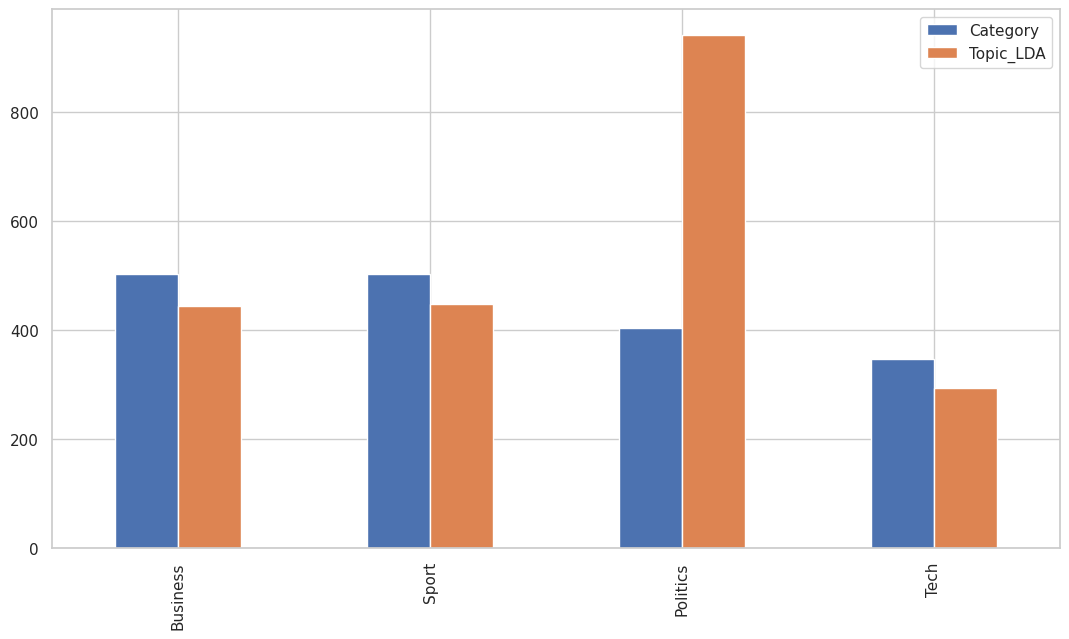

In [382]:
# Plot the count of articles categorized by each category using both the input and LDA-based categories
aggregate_plot(result_df_tfidf)

In [383]:
# Calculate and print the accuracy of the LDA model with TFIDF vectorization
accuracy = model_accuracy(result_df_tfidf)
print(f'The LDA model with TFIDF vectorization has an accuracy of {round(accuracy, 2)}%')

The LDA model with TFIDF vectorization has an accuracy of 73.55%


In [384]:
# Calculate precision, recall, and F1 scores for each category using the LDA model with TFIDF vectorization
precision_recall_f1_scores = precision_recall_f1(result_df_tfidf)
precision_recall_f1_scores

Topic      Recall  Precision   F1_Score
0  Business   86.481113  97.972973  91.869060
1  Politics  109.925558  42.507970  61.308197
2     Sport   56.660040  99.105145  72.099571
3      Tech         NaN  97.269625        NaN

It can be observed that implementation of the LDA model using Tfidf Vectorizer lowered the model accuracy. The model tended to over-determine the Entertainment Topic, hence the lower score of F1
The most frequent words in each topic is plotted in the next section

In [391]:
# Calculate the top 100 words for each topic using the TFIDF vectorizer and the best LDA model with TFIDF vectorization
top_words_tfidf = top_n_terms(tfidf_vectorizer, best_lda_model_tfidf, 100)

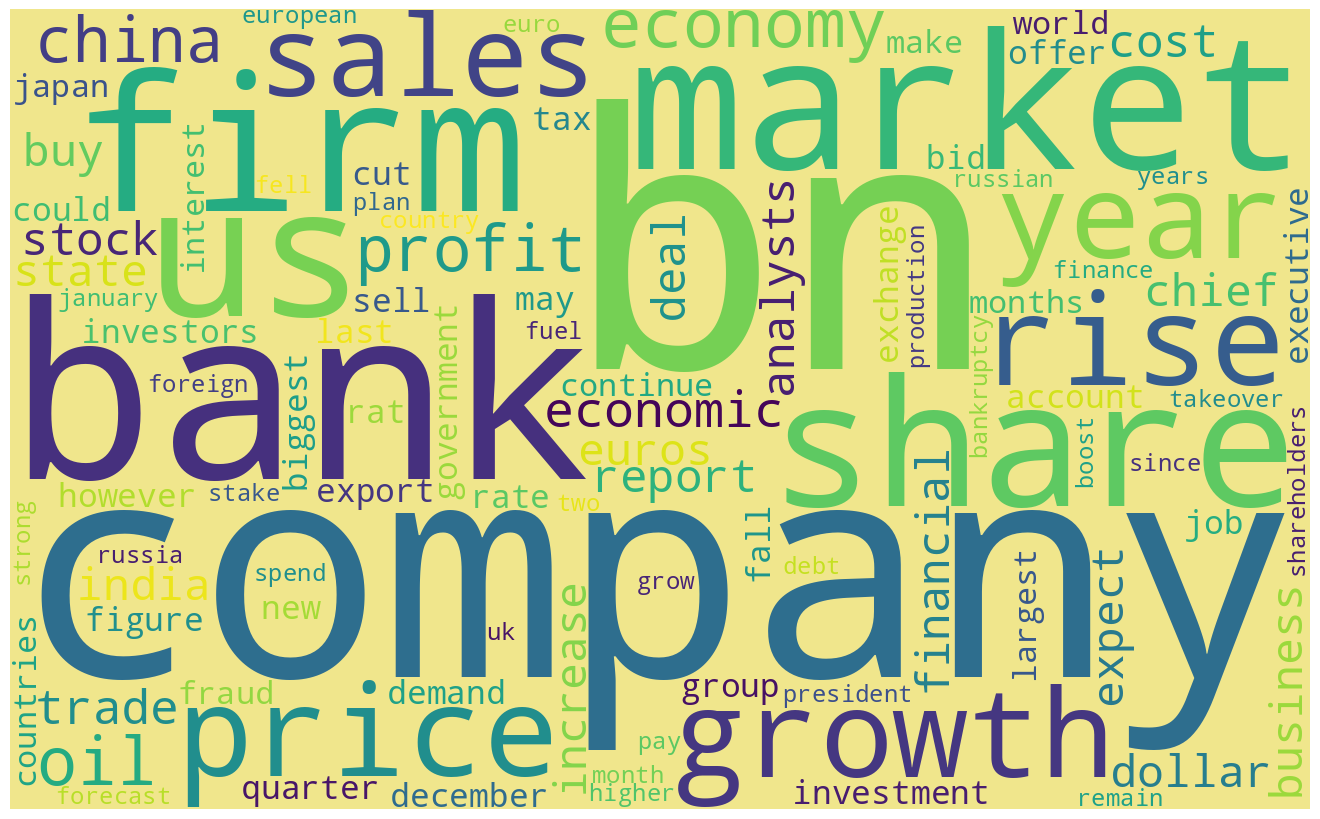

In [392]:
# Generate a word cloud visualization for the top words in Topic 0 obtained from TFIDF vectorization and the best LDA model with TFIDF vectorization
plot_wordcloud(top_words_tfidf[0])

Looking at the word distributions, it can be concluded that this is the Business Topic

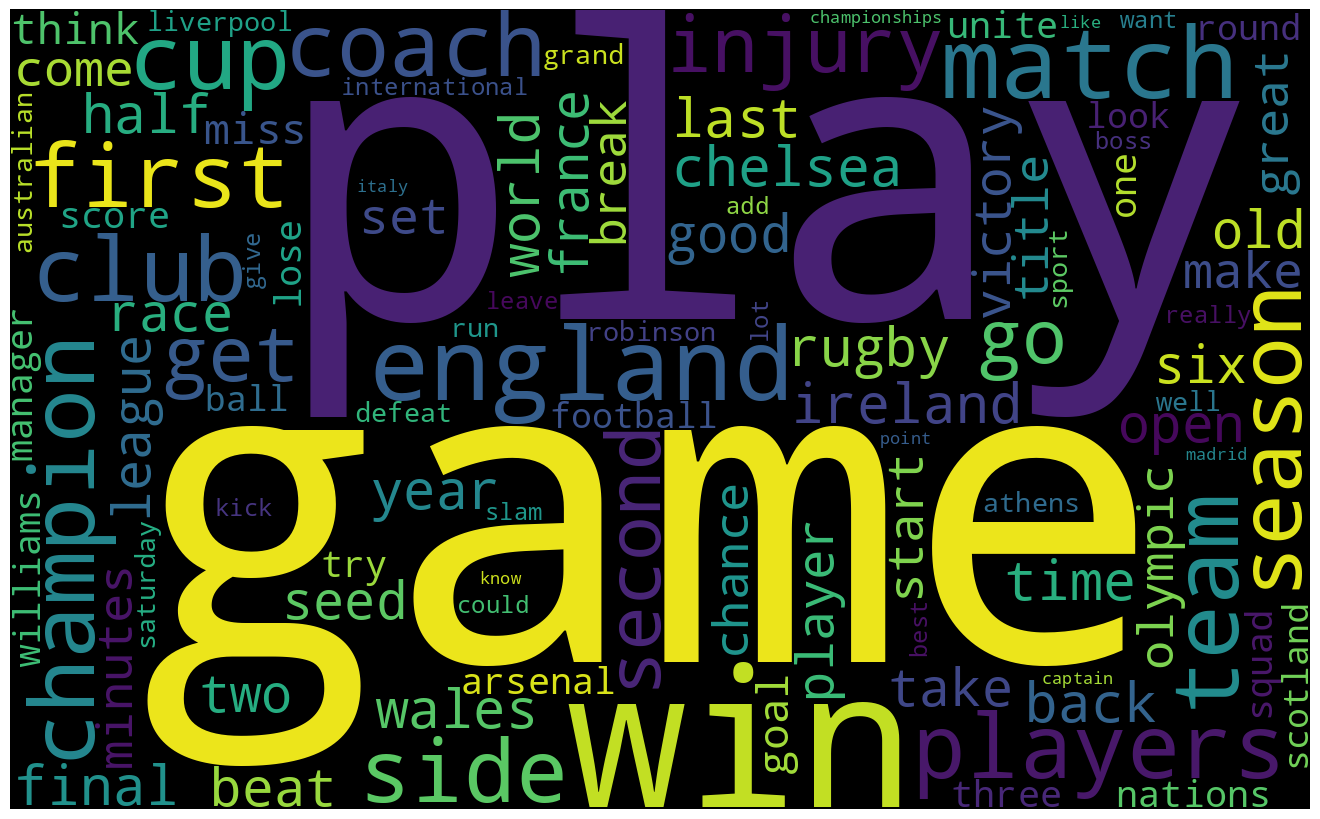

In [393]:
# Generate a word cloud visualization for the top words in Topic 1 obtained from TFIDF vectorization and the best LDA model with TFIDF vectorization
plot_wordcloud(top_words_tfidf[1])

Looking at the word distributions, it can be concluded that this is the Sport Topic

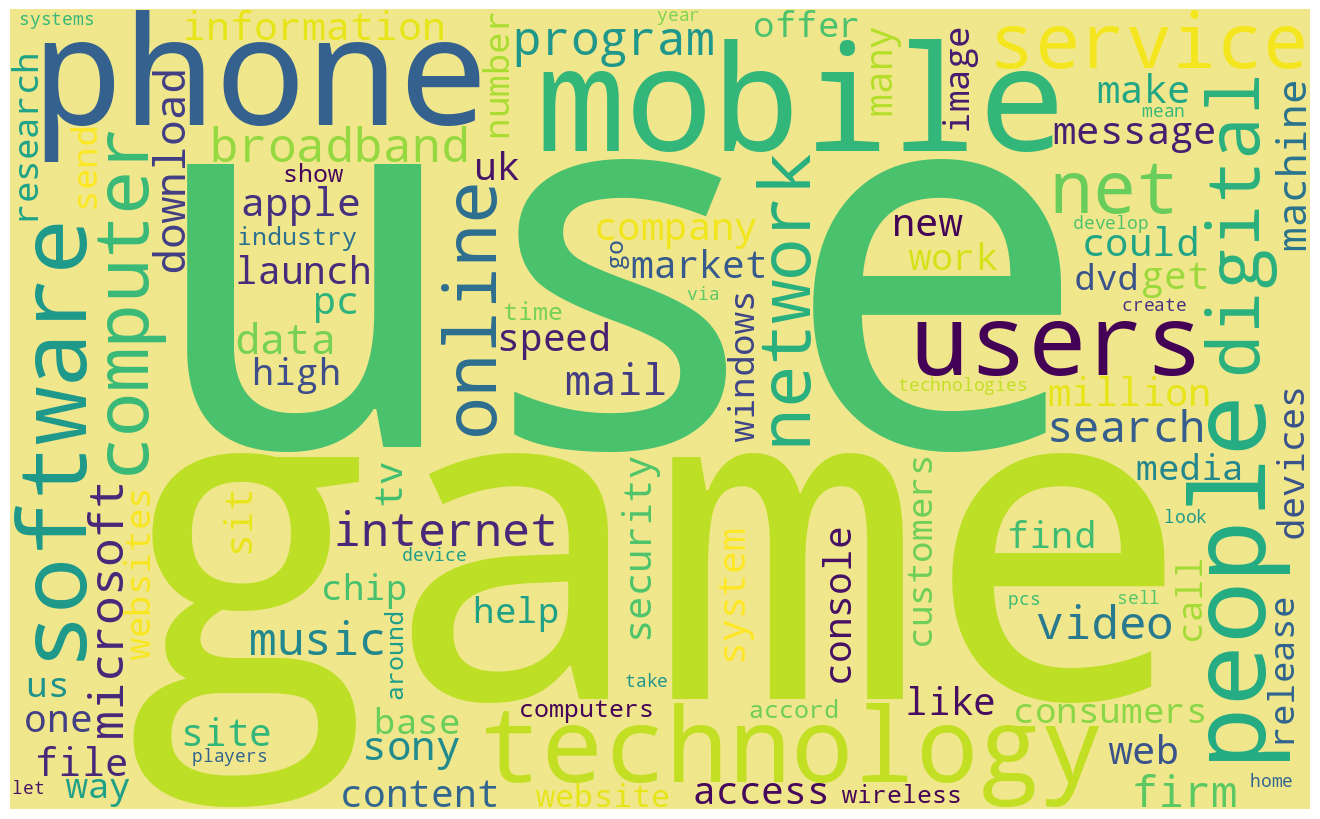

In [394]:
# Generate a word cloud visualization for the top words in Topic 2 obtained from TFIDF vectorization and the best LDA model with TFIDF vectorization
plot_wordcloud(top_words_tfidf[2])

Looking at the word distributions, it can be concluded that this is the Tech Topic

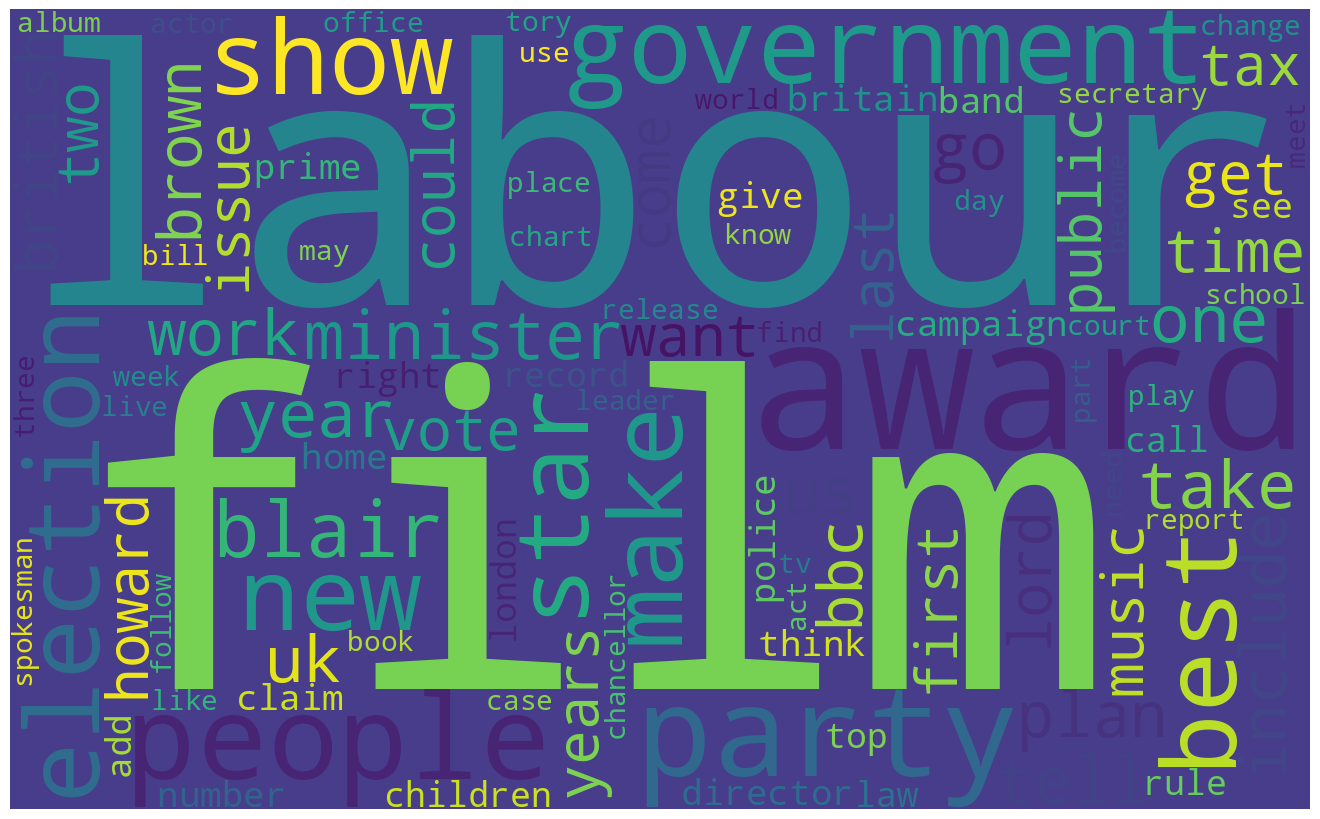

In [395]:
# Generate a word cloud visualization for the top words in Topic 3 obtained from TFIDF vectorization and the best LDA model with TFIDF vectorization
plot_wordcloud(top_words_tfidf[3])

Looking at the word distributions, it can be concluded that this is the Entertainment Topic

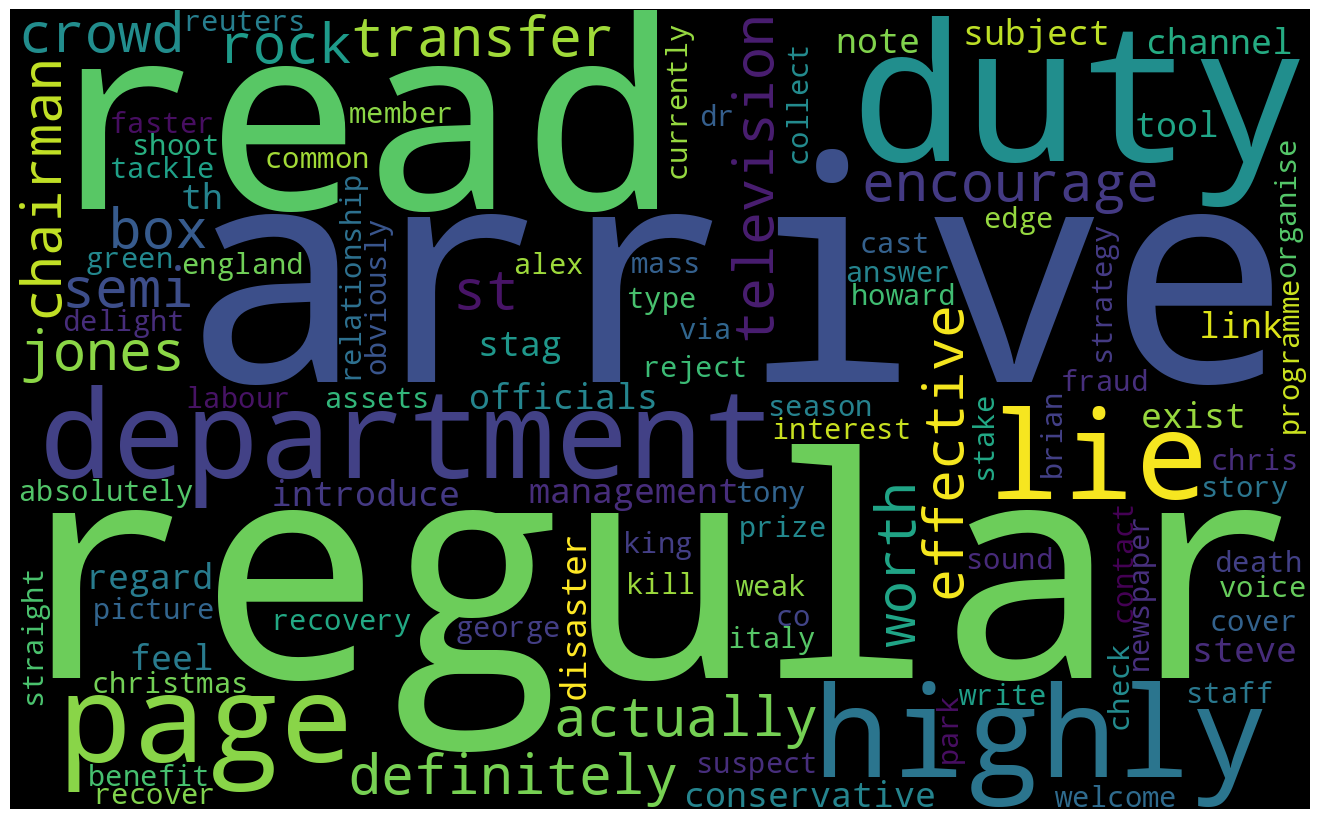

In [396]:
# Generate a word cloud visualization for the top words in Topic 4 obtained from TFIDF vectorization and the best LDA model with TFIDF vectorization
plot_wordcloud(top_words_tfidf[4])

Looking at the word distributions, it can be concluded that this is the Politics Topic

### ML Model - 3 **Latent Semantic Analysis**

In [397]:
# Fitting the LSA model on the TFIDF_Vectorized data
lsa_model = TruncatedSVD(n_components=5)
lsa_model.fit(tfidf_vectorized)

# Assigning the Topics categorised by LSA model to each document
result_df_lsa = assign_topics(data, tfidf_vectorized, lsa_model).rename(columns = {'Topic_LDA':'Topic_LSA'})
result_df_lsa.groupby('Topic_LSA')['Title'].count()

Topic_LSA
1    1821
2      53
3      95
4      56
5     100
Name: Title, dtype: int64

In [399]:
# Fitting the LSA model on the CountVectorized data
lsa_model = TruncatedSVD(n_components=5)
lsa_model.fit(tokenized_data)

TruncatedSVD(n_components=5)

In [400]:
# Assigning the Topics categorised by LSA model to each document
result_df_lsa = assign_topics(data, tfidf_vectorized, lsa_model).rename(columns = {'Topic_LDA':'Topic_LSA'})
result_df_lsa.groupby('Topic_LSA')['Title'].count()

Topic_LSA
1    1743
2      52
3      79
4      79
5     172
Name: Title, dtype: int64

It can be observed that the LSA algorithm when used on the dataset (tokenised with both TFIDF and the Bag-of-Words), over-determined one particular topic instead of the others

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


The evaluation of a Topic Modeling Algorithm involves multiple metrics to assess its performance. These metrics provide valuable insights into the model's ability to categorize documents and predict unseen data. Two key metrics used are Perplexity and Log-likelihood.

Perplexity measures how effectively the model predicts unseen documents. A lower perplexity score indicates better predictive performance, implying that the model comprehends the underlying topics well. On the other hand, Log-likelihood assesses the model's capability to explain the data. A higher Log-likelihood, combined with a lower perplexity, is generally indicative of a strong Topic Modeling Algorithm.

While these metrics offer insights, they are not standalone indicators of a model's quality. They must be considered alongside traditional classification evaluation metrics, such as Accuracy, Precision, Recall, and F1 Score. These metrics help evaluate how well the model categorizes documents, especially when the original categories are known.

Accuracy quantifies the proportion of articles correctly categorized by the model out of the total. However, Precision and Recall offer more specific insights. Precision emphasizes the accuracy of identifying articles that genuinely belong to a particular category, aiming to minimize mis-categorization. Recall focuses on avoiding the omission of articles that originally belong to a category, even if it results in some false positives.

In cases where there is no hierarchical structure among categories, and all categories are considered equal, the F1 Score becomes a crucial metric. The F1 Score strikes a balance between Precision and Recall, effectively considering both metrics. It is particularly valuable when no hierarchy exists between topics.

To illustrate, consider Model 1's Politics category. It demonstrated an impressive Recall of 99%, indicating its excellence in categorizing articles that genuinely belong to Politics. However, the model also misclassified articles from other categories as Politics, as evident from its Precision of around 82%. The F1 Score takes both these metrics into account and is a reliable measure of overall performance.

In summary, Perplexity and Log-likelihood provide insights into a Topic Modeling Algorithm's ability to predict unseen data and explain the dataset. However, these metrics are complemented by Accuracy, Precision, Recall, and F1 Score, which assess the model's performance in categorizing documents. When there is no predefined hierarchy among categories, the F1 Score becomes particularly valuable, striking a balance between minimizing misclassification and ensuring articles are not overlooked.

The combined evaluation of these metrics offers a comprehensive understanding of the Topic Modeling Algorithm's effectiveness and aids in making informed decisions about its application.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [404]:
print('Model 1: LDA with Count Vectorizer')
print(f"Log likelihood Score for the LDA model: {log_likelihood}")
print(f"Perplixity of the LDA model: {perplexity}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df),2)}%")
print(f"\n{prf1_m1}")

print("\n\nModel 2: LDA with TFIDF Vectorizer")
print(f"Log-likelihood Score for the LDA model: {log_likelihood_m2}")
print(f"Perplexity of the LDA model: {perplexity_m2}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df_tfidf),2)}%")
print(f"\n{prf1_m1}")

Model 1: LDA with Count Vectorizer
Log likelihood Score for the LDA model: -440223.92312249466
Perplixity of the LDA model: 741.3812205860239
Accuracy of the LDA model 92.94%

           Topic     Recall  Precision   F1_Score
0       Business  85.288270  97.722096  91.082803
1  Entertainment  92.140921  96.317280  94.182825
2       Politics  98.759305  81.893004  89.538808
3          Sport  98.210736  97.053045  97.628458
4           Tech  90.489914  92.899408  91.678832


Model 2: LDA with TFIDF Vectorizer
Log-likelihood Score for the LDA model: -29988.59243003374
Perplexity of the LDA model: 2138.7059110912187
Accuracy of the LDA model 73.55%

           Topic     Recall  Precision   F1_Score
0       Business  85.288270  97.722096  91.082803
1  Entertainment  92.140921  96.317280  94.182825
2       Politics  98.759305  81.893004  89.538808
3          Sport  98.210736  97.053045  97.628458
4           Tech  90.489914  92.899408  91.678832


The evaluation metrics reveal that both models are strong performers, with Model 1 showcasing slightly better results in terms of Perplexity and Log-likelihood. Model 2, while still performing well, exhibits slightly higher Perplexity and lower Log-likelihood scores. This suggests that Model 1 has a better ability to predict unseen documents and explain the data.

Therefore, considering the analysis and evaluation metrics, Model 1 - **LDA with CountVectorizer** - is chosen as the final prediction model. It demonstrates robust accuracy, precision, recall, and F1 Score, making it a reliable choice for categorizing articles into the specified topics.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model, Model 1 (**LDA with CountVectorizer**), has been selected for topic modeling of the given dataset based on a thorough evaluation of various metrics. Let's delve into the explanation of the model and the key features that influence its performance, although traditional machine learning model explainability tools may not directly apply to topic modeling. We can provide some insights into the model's behavior and feature importance based on the nature of LDA.

**Model Explanation:**

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling. It operates under the assumption that documents are mixtures of topics, and topics are mixtures of words. The model's objective is to uncover the underlying topics and their distribution in the document corpus.

In LDA, the key concepts are:

**Topics:** Hidden themes within the dataset, each characterized by a distribution of words.

**Documents:** Combinations of topics, with each topic contributing a certain proportion to a document.

**Words:** The observed words in documents.
Feature Importance:

In the context of topic modeling with LDA, there is no direct concept of "feature importance" as in traditional machine learning models where each feature corresponds to a particular word or term. Instead, we can gain insights into the features (words) that contribute to specific topics based on their word distributions.

The key features of Model 1 are the topics and their associated word distributions. These word distributions represent the importance of specific terms within each topic. Higher probabilities indicate that a word is more strongly associated with a particular topic.

For example, if "election," "vote," and "candidate" have high probabilities in a topic, it suggests that the topic is related to politics. Understanding these word distributions can provide insights into the characteristics of each topic.

Topic modeling interpretability tools such as pyLDAvis allow for visual exploration of topics and their word distributions. These tools provide interactive visualizations that help users understand the words driving each topic. This visualization can assist in extracting meaning and insights from the model.

In summary, Model 1 (LDA with CountVectorizer) excels in terms of Perplexity, Log-likelihood, Accuracy, Precision, Recall, and F1 Score. The key features are the topics and their associated word distributions, which are used to identify and interpret the themes and keywords that define each topic. While traditional feature importance measures do not directly apply, the focus is on understanding the composition of topics and the role of words within them for topic interpretation.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [407]:
# Save the File
import joblib

# Assuming "rf_model" is your best performing Random Forest model
best_model = best_lda_model

# Define the file path where you want to save the model
model_file_path = 'best_model.pkl'

# Save the model to a file
joblib.dump(best_model, model_file_path)

['best_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [408]:
# Load the File and predict unseen data.
model_file_path = 'best_model.pkl'
loaded_model = joblib.load(model_file_path)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project involved a comprehensive analysis of text data, specifically news articles, with the aim of uncovering underlying topics. Several noteworthy conclusions were drawn during the project:

**Data Parsing Challenges:** The initial stages of the project encountered encoding errors such as UnicodeError and ParserError when reading news articles in text file format. To address this, effective exception handling was implemented to ensure proper data reading. This ensured that the text data could be processed successfully.

**Textual Pre-processing:** The text data underwent a series of pre-processing steps to prepare it for topic modeling. During this phase, it became evident that further refinement was possible. For instance, additional stopwords could be removed to optimize the model further. Certain words like "use" and "go" may not contribute significantly to topic definition. Additionally, handling words like "us" became essential, as they can have multiple meanings, including "United States."

**Stemming vs. Lemmatization:** The choice of lemmatization over stemming for textual pre-processing was a strategic decision. Unlike stemming, which simply shortens words to their root form, lemmatization considers the context and morphology of words. This approach preserves the original meaning as much as possible, which is crucial in topic modeling. Topics often rely on the subtle nuances of language and word context, making lemmatization a preferred method to uncover these topics effectively.

**Null Hypotheses for Vectorization:** A critical step in the project was establishing a null hypothesis to determine the optimal vectorization technique for data tokenization. CountVectorizer and TFIDFVectorizer were considered, and the results favored CountVectorizer. This vectorization method is well-suited for LDA models, which rely on modeling word count distributions in documents and topic distributions across documents. CountVectorizer converts text into word count arrays, an ideal format for LDA models.

**LDA vs. LSA Models:** After implementing both Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA) models, a clear preference emerged for the LDA model. The LDA model, especially when used in conjunction with CountVectorizer for tokenization, outperformed LSA in categorizing the underlying topics in the news articles. The LDA model achieved a remarkable model accuracy of 93%, indicating its effectiveness in uncovering meaningful topics. Examining word distributions for each topic facilitated the easy identification of correlations between frequent words and topics.

In summary, the project addressed various data parsing challenges, refined textual pre-processing, and made strategic choices in terms of vectorization techniques and text processing methods. The final preference for the LDA model, driven by its high accuracy and interpretability, highlighted its effectiveness in uncovering latent topics within the corpus of news articles. These findings offer valuable insights for future projects involving topic modeling and text analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***